# Importar Librerias

In [1]:
import pandas as pd
import re
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sn

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed



# Carga de Datos

In [2]:
df = pd.read_csv('./train.csv')
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

# 3) Limpieza y Procesamiento de datos

In [3]:
tweets = list(df.iloc[:,3])

#Lista de caracteres que se repiten
disallowed_characters = "._!:@#'=><?()|_-/[]*~;"

#Lista de stopwords, etiquetas HTML y combinaciones de \x89 que deben ser removidas
disallowed_lit = ['our ', ' our ', ' of ', ' by ', ' there ', ' the ', ' and ', ' to ', '\n', '&amp', ' for ', ' nor ', 'yet', ' so ', ' but ', ' if ', 'if ', '&gt', '&lt', 'when', 'whenever', 'where', 'wherever', "while", ' for ', 'because', 'before', '\x89ûò', '\x89ûª', '\x89ûï', '\x89û÷', '\x89û', '\x89ã¢', '\x9d', '\x89ââ', '\x89ûó', '+']

for i in range(len(tweets)):
    
    #Cambiar todas las letras a minusculas
    tweets[i] = tweets[i].lower()
    
    #Eliminar links
    tweets[i] = re.sub('http://\S+|https://\S+', '', tweets[i])
    
    #Eliminar caracteres especiales
    for character in disallowed_characters:
        tweets[i] = tweets[i].replace(character, "")
    
    #Eliminar articulos, preposiciones y etiquetas HTML
    for character in disallowed_lit:
        tweets[i] = tweets[i].replace(character, " ")
    
    #Eliminar espacios que tienen tamaño superior a 1
    tweets[i] = re.sub("\s+" , " ", tweets[i])

#print(tweets)

df['cleaned_text'] = tweets

In [4]:
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                       cleaned_text  
0       1   deeds are reason this earthquake may allah fo...  
1       1              forest fire near la ronge sask canada  
2       1  all residents asked shelter in place are being...  
3       1  13,000 people receive wildfires evacuation ord...  
4       1  just got sent this photo from ruby alaska as s...

# 4) Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. 

In [82]:
# Función para encontrar frecuencia de palabras
def freq(str, prnt=True):
    palabra = []
    cantidad = []
 
    # Separamos el string en una lista de palabras
    str = str.split()        
    str2 = []
 
    # Iteramos en la lista, hasta el último valor
    for i in str:            
 
        # Chequeamos que exista más de una palabra
        if i not in str2:
 
            # Insertamos el valor el la lista
            str2.append(i)
             
    for i in range(0, len(str2)):
        
        palabra.append(str2[i])
        cantidad.append(int(str.count(str2[i])))
                        
        # Contamos la frecuencia de cada palabra presente en str2 y mostramos
        if prnt:
            print('La frecuencia de: ', str2[i], 'es :', str.count(str2[i]))
        
    return palabra, cantidad

In [6]:
texto = ""
for text in tweets:
    texto += text + " " 
    
palabra, cantidad = freq(texto)

La frecuencia de:  deeds es : 2
La frecuencia de:  are es : 402
La frecuencia de:  reason es : 20
La frecuencia de:  this es : 479
La frecuencia de:  earthquake es : 50
La frecuencia de:  may es : 88
La frecuencia de:  allah es : 9
La frecuencia de:  forgive es : 2
La frecuencia de:  us es : 164
La frecuencia de:  all es : 258
La frecuencia de:  forest es : 65
La frecuencia de:  fire es : 252
La frecuencia de:  near es : 54
La frecuencia de:  la es : 26
La frecuencia de:  ronge es : 1
La frecuencia de:  sask es : 1
La frecuencia de:  canada es : 11
La frecuencia de:  residents es : 8
La frecuencia de:  asked es : 9
La frecuencia de:  shelter es : 6
La frecuencia de:  in es : 1979
La frecuencia de:  place es : 26
La frecuencia de:  being es : 90
La frecuencia de:  notified es : 1
La frecuencia de:  officers es : 8
La frecuencia de:  no es : 255
La frecuencia de:  other es : 38
La frecuencia de:  evacuation es : 50
La frecuencia de:  or es : 204
La frecuencia de:  orders es : 11
La frecu

La frecuencia de:  retainers es : 1
La frecuencia de:  its es : 267
La frecuencia de:  quite es : 10
La frecuencia de:  weird es : 9
La frecuencia de:  better es : 36
La frecuencia de:  get es : 229
La frecuencia de:  used es : 30
La frecuencia de:  have es : 386
La frecuencia de:  wear es : 3
La frecuencia de:  them es : 113
La frecuencia de:  every es : 68
La frecuencia de:  single es : 11
La frecuencia de:  next es : 51
La frecuencia de:  year es : 69
La frecuencia de:  least es : 36
La frecuencia de:  deputies es : 4
La frecuencia de:  shot es : 27
La frecuencia de:  brighton es : 2
La frecuencia de:  home es : 76
La frecuencia de:  wife es : 12
La frecuencia de:  six es : 4
La frecuencia de:  years es : 79
La frecuencia de:  jail es : 3
La frecuencia de:  setting es : 11
La frecuencia de:  niece es : 3
La frecuencia de:  superintendent es : 1
La frecuencia de:  lanford es : 1
La frecuencia de:  salmon es : 3
La frecuencia de:  has es : 249
La frecuencia de:  r es : 17
La frecuenci

La frecuencia de:  there es : 21
La frecuencia de:  victory es : 5
La frecuencia de:  bargain es : 5
La frecuencia de:  basement es : 3
La frecuencia de:  prices es : 5
La frecuencia de:  dwight es : 1
La frecuencia de:  david es : 9
La frecuencia de:  eisenhower es : 1
La frecuencia de:  nobody es : 6
La frecuencia de:  remembers es : 1
La frecuencia de:  came es : 36
La frecuencia de:  charles es : 4
La frecuencia de:  schulz es : 1
La frecuencia de:  speaking es : 4
La frecuencia de:  someone es : 40
La frecuencia de:  using es : 13
La frecuencia de:  xb1 es : 2
La frecuencia de:  most es : 53
La frecuencia de:  also es : 44
La frecuencia de:  harder es : 1
La frecuencia de:  conflict es : 5
La frecuencia de:  glorious es : 3
La frecuencia de:  triumph es : 1
La frecuencia de:  thomas es : 7
La frecuencia de:  paine es : 1
La frecuencia de:  growingupspoiled es : 1
La frecuencia de:  going es : 103
La frecuencia de:  clay es : 1
La frecuencia de:  pigeon es : 1
La frecuencia de:  sh

La frecuencia de:  brazil es : 7
La frecuencia de:  exp es : 6
La frecuencia de:  wtf es : 12
La frecuencia de:  believe es : 28
La frecuencia de:  eyes es : 23
La frecuencia de:  nicole es : 1
La frecuencia de:  fletcher es : 1
La frecuencia de:  victim es : 12
La frecuencia de:  crashed es : 37
La frecuencia de:  times es : 48
La frecuencia de:  ago es : 26
La frecuencia de:  little es : 49
La frecuencia de:  bit es : 13
La frecuencia de:  trauma es : 39
La frecuencia de:  although es : 3
La frecuencia de:  shes es : 22
La frecuencia de:  omg es : 21
La frecuencia de:  bro es : 8
La frecuencia de:  jetengine es : 1
La frecuencia de:  turbojet es : 1
La frecuencia de:  boing es : 1
La frecuencia de:  g90 es : 1
La frecuencia de:  phone es : 37
La frecuencia de:  looks es : 46
La frecuencia de:  ship es : 21
La frecuencia de:  terrible es : 7
La frecuencia de:  statistically es : 1
La frecuencia de:  cop es : 8
La frecuencia de:  crashes es : 5
La frecuencia de:  house es : 43
La frecu

La frecuencia de:  case es : 22
La frecuencia de:  survivor es : 3
La frecuencia de:  evolved es : 1
La frecuencia de:  godlike es : 1
La frecuencia de:  completely es : 9
La frecuencia de:  cech es : 1
La frecuencia de:  paul es : 10
La frecuencia de:  keegan es : 1
La frecuencia de:  legion es : 3
La frecuencia de:  itself es : 6
La frecuencia de:  survivors es : 38
La frecuencia de:  imperfect es : 2
La frecuencia de:  project es : 6
La frecuencia de:  formed es : 3
La frecuencia de:  cell es : 4
La frecuencia de:  sirbrandonknt es : 1
La frecuencia de:  exactly es : 7
La frecuencia de:  lesnarcena es : 1
La frecuencia de:  match es : 11
La frecuencia de:  summerslam es : 1
La frecuencia de:  brock es : 2
La frecuencia de:  whos es : 6
La frecuencia de:  damascus es : 1
La frecuencia de:  syrian es : 11
La frecuencia de:  army es : 71
La frecuencia de:  grinds es : 1
La frecuencia de:  alloosh es : 1
La frecuencia de:  gang es : 6
La frecuencia de:  manure es : 1
La frecuencia de:  

La frecuencia de:  door es : 12
La frecuencia de:  nsa es : 1
La frecuencia de:  data es : 25
La frecuencia de:  mining es : 6
La frecuencia de:  software es : 2
La frecuencia de:  blog es : 8
La frecuencia de:  hyiderghost2 es : 1
La frecuencia de:  rtrrtcoach es : 1
La frecuencia de:  1008planet es : 1
La frecuencia de:  fighterdena es : 1
La frecuencia de:  sketch es : 2
La frecuencia de:  did es : 79
La frecuencia de:  based es : 10
La frecuencia de:  taste es : 4
La frecuencia de:  startrek es : 1
La frecuencia de:  tos es : 1
La frecuencia de:  aberdeenfc es : 1
La frecuencia de:  aberdeenfanpage es : 1
La frecuencia de:  luck es : 6
La frecuencia de:  tomorrow es : 32
La frecuencia de:  coefficient es : 1
La frecuencia de:  points es : 8
La frecuencia de:  plz es : 1
La frecuencia de:  paddytomlinson1 es : 1
La frecuencia de:  rohnertparkdps es : 2
La frecuencia de:  justice es : 6
La frecuencia de:  department es : 15
La frecuencia de:  havent es : 13
La frecuencia de:  paid es

La frecuencia de:  scheme es : 6
La frecuencia de:  lgbt es : 5
La frecuencia de:  trial es : 5
La frecuencia de:  burglary es : 1
La frecuencia de:  palestinian es : 12
La frecuencia de:  cracks es : 2
La frecuencia de:  amid es : 23
La frecuencia de:  protests es : 3
La frecuencia de:  kisii es : 6
La frecuencia de:  hunt es : 9
La frecuencia de:  failed es : 6
La frecuencia de:  plot es : 7
La frecuencia de:  countynews es : 2
La frecuencia de:  mariah es : 2
La frecuencia de:  thick es : 3
La frecuencia de:  shoulders es : 3
La frecuencia de:  girl es : 40
La frecuencia de:  shira es : 2
La frecuencia de:  banki es : 1
La frecuencia de:  relaxinpr es : 1
La frecuencia de:  miprv es : 1
La frecuencia de:  latimes es : 3
La frecuencia de:  prayed es : 1
La frecuencia de:  treated es : 2
La frecuencia de:  huffpostrelig es : 1
La frecuencia de:  theadvocatemag es : 2
La frecuencia de:  saynae es : 1
La frecuencia de:  tennessee es : 5
La frecuencia de:  lesbian es : 3
La frecuencia de

La frecuencia de:  female es : 6
La frecuencia de:  somehow es : 6
La frecuencia de:  claim es : 5
La frecuencia de:  offended es : 1
La frecuencia de:  transgendered es : 1
La frecuencia de:  media es : 28
La frecuencia de:  helicopters es : 2
La frecuencia de:  civilians es : 8
La frecuencia de:  gaza es : 7
La frecuencia de:  completed es : 2
La frecuencia de:  exercises es : 1
La frecuencia de:  greece es : 2
La frecuencia de:  christian es : 19
La frecuencia de:  muslims es : 18
La frecuencia de:  temple es : 19
La frecuencia de:  mount es : 18
La frecuencia de:  waving es : 15
La frecuencia de:  pamela es : 16
La frecuencia de:  geller es : 15
La frecuencia de:  pt es : 2
La frecuencia de:  unit es : 6
La frecuencia de:  responsible es : 5
La frecuencia de:  targeting es : 4
La frecuencia de:  scholars es : 1
La frecuencia de:  imprisoning es : 1
La frecuencia de:  youth es : 22
La frecuencia de:  telnet es : 1
La frecuencia de:  1241317240 es : 1
La frecuencia de:  streamyxhomes

La frecuencia de:  ripped es : 3
La frecuencia de:  hole es : 5
La frecuencia de:  saturn es : 2
La frecuencia de:  eytay es : 1
La frecuencia de:  neur0sis es : 1
La frecuencia de:  animations es : 1
La frecuencia de:  happens es : 11
La frecuencia de:  cbsbigbrother es : 2
La frecuencia de:  du19 es : 1
La frecuencia de:  rap es : 2
La frecuencia de:  internal es : 5
La frecuencia de:  external es : 6
La frecuencia de:  motivation es : 2
La frecuencia de:  item es : 2
La frecuencia de:  phantasmal es : 1
La frecuencia de:  cummerbund es : 1
La frecuencia de:  warcraft es : 3
La frecuencia de:  young es : 16
La frecuencia de:  german es : 7
La frecuencia de:  stormtrooper es : 1
La frecuencia de:  engaged es : 1
La frecuencia de:  somme es : 1
La frecuencia de:  1916 es : 2
La frecuencia de:  800 es : 4
La frecuencia de:  ìñ es : 1
La frecuencia de:  582 es : 2
La frecuencia de:  marvel es : 4
La frecuencia de:  dc es : 12
La frecuencia de:  avengers es : 2
La frecuencia de:  utahcana

La frecuencia de:  sucks es : 4
La frecuencia de:  describing es : 3
La frecuencia de:  future es : 12
La frecuencia de:  therapies es : 2
La frecuencia de:  technologies es : 2
La frecuencia de:  sexuality es : 1
La frecuencia de:  diagnosis es : 1
La frecuencia de:  digitalhealth es : 1
La frecuencia de:  hcsm es : 1
La frecuencia de:  aphiabeta1907 es : 1
La frecuencia de:  wugliness es : 1
La frecuencia de:  uglyamesocialaction es : 1
La frecuencia de:  frats es : 1
La frecuencia de:  bioterrorismim es : 1
La frecuencia de:  fbi es : 4
La frecuencia de:  $tolewantg es : 1
La frecuencia de:  homeabc es : 1
La frecuencia de:  howardu es : 1
La frecuencia de:  hers es : 2
La frecuencia de:  cspanwj es : 1
La frecuencia de:  onufrance es : 1
La frecuencia de:  7475 es : 1
La frecuencia de:  rockefellerchirockefellerunivheiress es : 1
La frecuencia de:  evade es : 1
La frecuencia de:  lgl es : 1
La frecuencia de:  efforts es : 5
La frecuencia de:  prosecute es : 1
La frecuencia de:  blk

La frecuencia de:  midday es : 1
La frecuencia de:  sun es : 12
La frecuencia de:  rn es : 9
La frecuencia de:  bekahw es : 1
La frecuencia de:  sweat es : 2
La frecuencia de:  bullets es : 5
La frecuencia de:  beating es : 1
La frecuencia de:  acousticmaloley es : 1
La frecuencia de:  officialtjonez es : 1
La frecuencia de:  words es : 28
La frecuencia de:  fam es : 4
La frecuencia de:  beyond es : 11
La frecuencia de:  blessed es : 6
La frecuencia de:  dude es : 15
La frecuencia de:  respect es : 6
La frecuencia de:  fantasy es : 9
La frecuencia de:  escorts es : 1
La frecuencia de:  gfe es : 1
La frecuencia de:  dubai es : 1
La frecuencia de:  srajapakse es : 1
La frecuencia de:  missy es : 1
La frecuencia de:  suited es : 1
La frecuencia de:  summertime es : 2
La frecuencia de:  yeehaw es : 1
La frecuencia de:  asukager es : 1
La frecuencia de:  magical es : 1
La frecuencia de:  bag es : 41
La frecuencia de:  elwoods es : 1
La frecuencia de:  blazingelwoods es : 1
La frecuencia de:

La frecuencia de:  jack es : 7
La frecuencia de:  realhotcullen es : 1
La frecuencia de:  wed es : 7
La frecuencia de:  deep es : 14
La frecuencia de:  roads es : 8
La frecuencia de:  lyrium es : 1
La frecuencia de:  aint es : 18
La frecuencia de:  load es : 6
La frecuencia de:  welfare es : 3
La frecuencia de:  loving es : 9
La frecuencia de:  spongea es : 1
La frecuencia de:  society es : 7
La frecuencia de:  prysmian es : 1
La frecuencia de:  secures es : 1
La frecuencia de:  contract es : 2
La frecuencia de:  bank es : 7
La frecuencia de:  heights es : 4
La frecuencia de:  shaker es : 2
La frecuencia de:  toddcalfee es : 1
La frecuencia de:  mattburgener es : 1
La frecuencia de:  info es : 15
La frecuencia de:  carl es : 1
La frecuencia de:  everest es : 1
La frecuencia de:  cobes es : 1
La frecuencia de:  whitt es : 1
La frecuencia de:  frost es : 1
La frecuencia de:  snuff es : 2
La frecuencia de:  godly es : 1
La frecuencia de:  beer es : 4
La frecuencia de:  someday es : 1
La f

La frecuencia de:  sethalphaeus es : 1
La frecuencia de:  personal es : 5
La frecuencia de:  favorites es : 2
La frecuencia de:  include es : 5
La frecuencia de:  paramore es : 1
La frecuencia de:  muse es : 1
La frecuencia de:  royal es : 3
La frecuencia de:  5sos es : 3
La frecuencia de:  shed es : 2
La frecuencia de:  innocent es : 4
La frecuencia de:  sons es : 2
La frecuencia de:  daughters es : 4
La frecuencia de:  land es : 32
La frecuencia de:  polluted es : 1
La frecuencia de:  psalms es : 2
La frecuencia de:  10638 es : 1
La frecuencia de:  sin es : 3
La frecuencia de:  abortion es : 3
La frecuencia de:  se es : 6
La frecuencia de:  pone es : 1
La frecuencia de:  cantar es : 1
La frecuencia de:  lightning es : 44
La frecuencia de:  everwhe es : 1
La frecuencia de:  items es : 2
La frecuencia de:  everyday es : 6
La frecuencia de:  looooooooooool es : 1
La frecuencia de:  infected es : 1
La frecuencia de:  piercings es : 1
La frecuencia de:  aggress es : 1
La frecuencia de:  a

La frecuencia de:  ra es : 1
La frecuencia de:  al es : 8
La frecuencia de:  ghul es : 1
La frecuencia de:  escaped es : 2
La frecuencia de:  thebriankrause es : 1
La frecuencia de:  leos es : 1
La frecuencia de:  ass es : 51
La frecuencia de:  metaphorically es : 1
La frecuencia de:  piperwearsthepants es : 1
La frecuencia de:  charmed es : 1
La frecuencia de:  anarchicteapot es : 1
La frecuencia de:  boironusa es : 1
La frecuencia de:  zeno001 es : 1
La frecuencia de:  glononium es : 1
La frecuencia de:  6c es : 1
La frecuencia de:  helps es : 3
La frecuencia de:  bashing es : 1
La frecuencia de:  bottle es : 3
La frecuencia de:  nitroglycerin es : 1
La frecuencia de:  shoulder es : 30
La frecuencia de:  tote es : 15
La frecuencia de:  handbag es : 15
La frecuencia de:  cross es : 47
La frecuencia de:  faux es : 13
La frecuencia de:  fashion es : 16
La frecuencia de:  purse es : 12
La frecuencia de:  republicans es : 7
La frecuencia de:  questergirl es : 1
La frecuencia de:  ditto es

La frecuencia de:  hampered es : 1
La frecuencia de:  liking es : 1
La frecuencia de:  crossbody es : 1
La frecuencia de:  ella es : 1
La frecuencia de:  vickers es : 1
La frecuencia de:  washable es : 1
La frecuencia de:  zicac es : 1
La frecuencia de:  briefcase es : 1
La frecuencia de:  investigating es : 15
La frecuencia de:  washington es : 15
La frecuencia de:  canvas es : 2
La frecuencia de:  waist es : 2
La frecuencia de:  packs es : 5
La frecuencia de:  solid es : 3
La frecuencia de:  sports es : 8
La frecuencia de:  zipper es : 1
La frecuencia de:  coffee es : 9
La frecuencia de:  positive es : 4
La frecuencia de:  norge2040 es : 1
La frecuencia de:  itsnews es : 4
La frecuencia de:  derivatives es : 1
La frecuencia de:  quadrillion es : 1
La frecuencia de:  theaf es : 1
La frecuencia de:  comments es : 5
La frecuencia de:  japans es : 5
La frecuencia de:  atom es : 1
La frecuencia de:  firework es : 1
La frecuencia de:  picture es : 10
La frecuencia de:  hiroshima es : 88
La

La frecuencia de:  voltaire es : 1
La frecuencia de:  network es : 4
La frecuencia de:  cryptic es : 3
La frecuencia de:  guided es : 3
La frecuencia de:  mission es : 6
La frecuencia de:  70th es : 16
La frecuencia de:  schedule es : 7
La frecuencia de:  visited es : 3
La frecuencia de:  humbled es : 1
La frecuencia de:  november es : 2
La frecuencia de:  moscowghost es : 1
La frecuencia de:  sayedridha es : 1
La frecuencia de:  aminakh es : 1
La frecuencia de:  congratulations es : 1
La frecuencia de:  capturing es : 1
La frecuencia de:  besieged es : 1
La frecuencia de:  indiscriminate es : 1
La frecuencia de:  claiming es : 1
La frecuencia de:  moral es : 3
La frecuencia de:  banthebomb es : 1
La frecuencia de:  setting4success es : 1
La frecuencia de:  bells es : 6
La frecuencia de:  toll es : 6
La frecuencia de:  smallbusiness es : 1
La frecuencia de:  entrepreneur es : 2
La frecuencia de:  nbcnews es : 3
La frecuencia de:  pearlharbor es : 1
La frecuencia de:  marked es : 4
La f

La frecuencia de:  outrage es : 17
La frecuencia de:  rockbottomradfm es : 2
La frecuencia de:  challenges es : 2
La frecuencia de:  rescuing es : 1
La frecuencia de:  saving es : 10
La frecuencia de:  soaking es : 2
La frecuencia de:  tonne es : 1
La frecuencia de:  alcohol es : 4
La frecuencia de:  mat es : 1
La frecuencia de:  gbbo es : 20
La frecuencia de:  ppfa es : 1
La frecuencia de:  stores es : 2
La frecuencia de:  witness es : 2
La frecuencia de:  explode es : 41
La frecuencia de:  afternoon es : 8
La frecuencia de:  mikecroninwmur es : 1
La frecuencia de:  xela es : 1
La frecuencia de:  struggle es : 1
La frecuencia de:  equipment es : 9
La frecuencia de:  grateful es : 5
La frecuencia de:  dcfd es : 1
La frecuencia de:  chr3lyc es : 1
La frecuencia de:  iaff36 es : 1
La frecuencia de:  croydon es : 1
La frecuencia de:  riots es : 6
La frecuencia de:  crowds es : 1
La frecuencia de:  reeves es : 1
La frecuencia de:  corner es : 2
La frecuencia de:  croydonization es : 1
La f

La frecuencia de:  donny es : 1
La frecuencia de:  returned es : 4
La frecuencia de:  method es : 4
La frecuencia de:  integrates es : 1
La frecuencia de:  format es : 1
La frecuencia de:  interval es : 1
La frecuencia de:  muscle es : 4
La frecuencia de:  shaping es : 1
La frecuencia de:  techniqu es : 1
La frecuencia de:  bored es : 4
La frecuencia de:  desire es : 5
La frecuencia de:  goals es : 4
La frecuencia de:  lou es : 1
La frecuencia de:  holtz es : 1
La frecuencia de:  uhhhhh es : 1
La frecuencia de:  demon es : 2
La frecuencia de:  crusade es : 1
La frecuencia de:  boat es : 37
La frecuencia de:  memories es : 25
La frecuencia de:  web es : 1
La frecuencia de:  nagelashley es : 1
La frecuencia de:  vicken52 es : 1
La frecuencia de:  basedlarock es : 1
La frecuencia de:  goonc1ty es : 1
La frecuencia de:  rubi es : 1
La frecuencia de:  stacks es : 1
La frecuencia de:  apply es : 10
La frecuencia de:  parents es : 14
La frecuencia de:  michael5sos es : 4
La frecuencia de:  ba

La frecuencia de:  drinks es : 3
La frecuencia de:  each es : 11
La frecuencia de:  account es : 13
La frecuencia de:  fallingoffstool es : 1
La frecuencia de:  albums es : 1
La frecuencia de:  yemen es : 3
La frecuencia de:  laughing es : 5
La frecuencia de:  sorrow es : 1
La frecuencia de:  throwin es : 1
La frecuencia de:  catwoman1775 es : 1
La frecuencia de:  crazier es : 1
La frecuencia de:  shooter es : 2
La frecuencia de:  sutherland es : 1
La frecuencia de:  pine es : 1
La frecuencia de:  theleadernews es : 1
La frecuencia de:  flyopinemonkey es : 1
La frecuencia de:  followup es : 1
La frecuencia de:  honshu es : 1
La frecuencia de:  operation es : 7
La frecuencia de:  coronet es : 1
La frecuencia de:  1m es : 2
La frecuencia de:  allied es : 1
La frecuencia de:  30m es : 1
La frecuencia de:  alcoholandmetal es : 1
La frecuencia de:  fix es : 6
La frecuencia de:  trusted es : 1
La frecuencia de:  reach es : 5
La frecuencia de:  countermoonbat es : 1
La frecuencia de:  voodoob

La frecuencia de:  48 es : 4
La frecuencia de:  savedenaliwolves es : 1
La frecuencia de:  tweetstorm es : 1
La frecuencia de:  markargent es : 1
La frecuencia de:  finished es : 2
La frecuencia de:  bbc es : 19
La frecuencia de:  r5live es : 1
La frecuencia de:  studio es : 2
La frecuencia de:  discussion es : 2
La frecuencia de:  sheer es : 2
La frecuencia de:  herring es : 1
La frecuencia de:  scraptrident es : 1
La frecuencia de:  becomes es : 5
La frecuencia de:  race es : 4
La frecuencia de:  success es : 4
La frecuencia de:  frustration es : 1
La frecuencia de:  vegas es : 4
La frecuencia de:  pieceofme es : 1
La frecuencia de:  learning es : 8
La frecuencia de:  eruption es : 7
La frecuencia de:  benefits es : 4
La frecuencia de:  weathernetwork es : 3
La frecuencia de:  acute es : 3
La frecuencia de:  takes es : 19
La frecuencia de:  precedent es : 1
La frecuencia de:  ptsd es : 3
La frecuencia de:  follows es : 4
La frecuencia de:  undetected es : 1
La frecuencia de:  catastr

La frecuencia de:  austrian es : 1
La frecuencia de:  interview es : 7
La frecuencia de:  materialism es : 1
La frecuencia de:  talkradio es : 2
La frecuencia de:  investing es : 2
La frecuencia de:  actions es : 8
La frecuencia de:  strategies es : 1
La frecuencia de:  securing es : 1
La frecuencia de:  lasting es : 2
La frecuencia de:  blowout es : 3
La frecuencia de:  trapped es : 42
La frecuencia de:  circus es : 2
La frecuencia de:  tent es : 9
La frecuencia de:  clowns es : 1
La frecuencia de:  implode es : 1
La frecuencia de:  dccomics es : 1
La frecuencia de:  imagecomics es : 1
La frecuencia de:  darkhorsecomics es : 1
La frecuencia de:  idwpublishing es : 1
La frecuencia de:  enabling es : 1
La frecuencia de:  eurocrisis es : 1
La frecuencia de:  greeces es : 3
La frecuencia de:  revenues es : 3
La frecuencia de:  continues es : 8
La frecuencia de:  talks es : 3
La frecuencia de:  proposed es : 2
La frecuencia de:  commodity es : 1
La frecuencia de:  absolutely es : 13
La fre

La frecuencia de:  ihave44episodesofgg es : 1
La frecuencia de:  nojoke es : 1
La frecuencia de:  redcoatjackpot es : 1
La frecuencia de:  none es : 9
La frecuencia de:  managed es : 2
La frecuencia de:  targets es : 4
La frecuencia de:  curse es : 1
La frecuencia de:  selfie es : 4
La frecuencia de:  ask es : 11
La frecuencia de:  ebike es : 4
La frecuencia de:  portugal es : 2
La frecuencia de:  suffered es : 3
La frecuencia de:  nonlife es : 2
La frecuencia de:  injuries es : 44
La frecuencia de:  newswatch es : 2
La frecuencia de:  lock es : 3
La frecuencia de:  lansdowne es : 2
La frecuencia de:  sts es : 2
La frecuencia de:  ptbo es : 2
La frecuencia de:  emerg es : 2
La frecuencia de:  lanjut es : 1
La frecuencia de:  dirumah es : 1
La frecuencia de:  yagitudeh es : 1
La frecuencia de:  jake es : 1
La frecuencia de:  rumah es : 1
La frecuencia de:  cipinang es : 1
La frecuencia de:  femalegilgameshs es : 1
La frecuencia de:  assault es : 1
La frecuencia de:  useless es : 1
La fr

La frecuencia de:  downloading es : 1
La frecuencia de:  tutorial es : 4
La frecuencia de:  maj es : 3
La frecuencia de:  muzzamil es : 2
La frecuencia de:  offr es : 2
La frecuencia de:  mi17 es : 2
La frecuencia de:  mansehra es : 5
La frecuencia de:  avoiding es : 8
La frecuencia de:  microlight es : 7
La frecuencia de:  landi es : 1
La frecuencia de:  peritoengrafoscopia es : 1
La frecuencia de:  4am es : 1
La frecuencia de:  neileastwood77 es : 1
La frecuencia de:  knobhead es : 1
La frecuencia de:  landing es : 17
La frecuencia de:  brianroemmele es : 1
La frecuencia de:  ux es : 1
La frecuencia de:  emv es : 1
La frecuencia de:  insert es : 1
La frecuencia de:  remove es : 10
La frecuencia de:  pump es : 5
La frecuencia de:  stripe es : 1
La frecuencia de:  reader es : 1
La frecuencia de:  pos es : 1
La frecuencia de:  hamayun es : 1
La frecuencia de:  shaheed es : 1
La frecuencia de:  mi7 es : 1
La frecuencia de:  heli es : 1
La frecuencia de:  uk es : 17
La frecuencia de:  ros

La frecuencia de:  obligations es : 1
La frecuencia de:  daviskawalya es : 1
La frecuencia de:  mauryn143 es : 1
La frecuencia de:  final es : 8
La frecuencia de:  goodbyes es : 1
La frecuencia de:  graduated es : 1
La frecuencia de:  stupidniggr es : 1
La frecuencia de:  cancel es : 4
La frecuencia de:  cats es : 4
La frecuencia de:  doctor es : 4
La frecuencia de:  appointment es : 2
La frecuencia de:  decided es : 5
La frecuencia de:  0605 es : 1
La frecuencia de:  damp es : 1
La frecuencia de:  qnh es : 1
La frecuencia de:  1028 es : 1
La frecuencia de:  pays es : 3
La frecuencia de:  oldest es : 1
La frecuencia de:  freedom es : 5
La frecuencia de:  donthate es : 1
La frecuencia de:  sct012 es : 1
La frecuencia de:  bkn025 es : 1
La frecuencia de:  rite es : 1
La frecuencia de:  tlk es : 1
La frecuencia de:  widout es : 1
La frecuencia de:  nuh es : 1
La frecuencia de:  fi es : 2
La frecuencia de:  steal es : 2
La frecuencia de:  di es : 7
La frecuencia de:  itz es : 1
La frecuenc

La frecuencia de:  beelievedc es : 1
La frecuencia de:  discoverycntr es : 1
La frecuencia de:  contractor es : 1
La frecuencia de:  swb1192 es : 1
La frecuencia de:  nda es : 2
La frecuencia de:  offer es : 5
La frecuencia de:  prolly es : 1
La frecuencia de:  trillion es : 2
La frecuencia de:  crosses es : 3
La frecuencia de:  3rd es : 4
La frecuencia de:  fieldwide es : 1
La frecuencia de:  instant es : 3
La frecuencia de:  np es : 5
La frecuencia de:  metallica es : 1
La frecuencia de:  inc es : 2
La frecuencia de:  inmates es : 1
La frecuencia de:  remand es : 1
La frecuencia de:  crosssectarian es : 1
La frecuencia de:  shia es : 1
La frecuencia de:  cleric es : 2
La frecuencia de:  militias es : 1
La frecuencia de:  withdrawur es : 1
La frecuencia de:  fightin es : 1
La frecuencia de:  isis es : 33
La frecuencia de:  uve es : 1
La frecuencia de:  wonderousallure es : 1
La frecuencia de:  hhello es : 1
La frecuencia de:  thesensualeye es : 1
La frecuencia de:  model es : 3
La fre

La frecuencia de:  ssshhheeesshh es : 1
La frecuencia de:  rep es : 4
La frecuencia de:  vibrator es : 1
La frecuencia de:  shaped es : 2
La frecuencia de:  vape es : 1
La frecuencia de:  busted es : 1
La frecuencia de:  adult es : 6
La frecuencia de:  plague es : 6
La frecuencia de:  pro es : 4
La frecuencia de:  console es : 2
La frecuencia de:  ring es : 4
La frecuencia de:  gainesville es : 1
La frecuencia de:  ferguson es : 6
La frecuencia de:  papiichampoo es : 1
La frecuencia de:  era es : 2
La frecuencia de:  civility es : 1
La frecuencia de:  prez es : 2
La frecuencia de:  supports es : 3
La frecuencia de:  jeromekem es : 1
La frecuencia de:  cousins es : 2
La frecuencia de:  hang es : 4
La frecuencia de:  rss es : 2
La frecuencia de:  recognize es : 5
La frecuencia de:  spouse es : 1
La frecuencia de:  samesex es : 2
La frecuencia de:  certificate es : 2
La frecuencia de:  loyalty es : 1
La frecuencia de:  involves es : 1
La frecuencia de:  kicking es : 1
La frecuencia de:  s

La frecuencia de:  client es : 5
La frecuencia de:  recommended es : 2
La frecuencia de:  java es : 1
La frecuencia de:  swing es : 3
La frecuencia de:  predynastic es : 1
La frecuencia de:  period es : 3
La frecuencia de:  dumuzid es : 1
La frecuencia de:  shepherd es : 6
La frecuencia de:  theghostparty es : 1
La frecuencia de:  amsosorry es : 1
La frecuencia de:  vines es : 1
La frecuencia de:  encaustic es : 1
La frecuencia de:  cerography es : 1
La frecuencia de:  portion es : 3
La frecuencia de:  byityf es : 1
La frecuencia de:  surf es : 3
La frecuencia de:  motion es : 2
La frecuencia de:  therapy es : 3
La frecuencia de:  programme es : 2
La frecuencia de:  stephaniemarija es : 1
La frecuencia de:  dressing es : 1
La frecuencia de:  incessant es : 1
La frecuencia de:  perhaps es : 4
La frecuencia de:  historic es : 3
La frecuencia de:  applied es : 1
La frecuencia de:  exposed es : 2
La frecuencia de:  childsexabuse es : 1
La frecuencia de:  truly es : 5
La frecuencia de:  cov

La frecuencia de:  sell es : 2
La frecuencia de:  murlo es : 1
La frecuencia de:  android es : 1
La frecuencia de:  tribez es : 1
La frecuencia de:  androidgames es : 1
La frecuencia de:  gameinsight es : 1
La frecuencia de:  jollyjinu es : 1
La frecuencia de:  babri es : 1
La frecuencia de:  todayhave es : 1
La frecuencia de:  revenge es : 1
La frecuencia de:  businessman es : 1
La frecuencia de:  foiled es : 1
La frecuencia de:  troupe es : 1
La frecuencia de:  multiracial es : 1
La frecuencia de:  breakdancers es : 1
La frecuencia de:  orianna es : 1
La frecuencia de:  xd es : 6
La frecuencia de:  drakes es : 1
La frecuencia de:  ghostwriting es : 1
La frecuencia de:  rihanna es : 2
La frecuencia de:  arin es : 1
La frecuencia de:  gummy es : 1
La frecuencia de:  grumpout es : 1
La frecuencia de:  srsly es : 1
La frecuencia de:  partners es : 1
La frecuencia de:  dribbling es : 1
La frecuencia de:  nostrils es : 2
La frecuencia de:  urself es : 1
La frecuencia de:  whether es : 5
La

La frecuencia de:  passengers es : 15
La frecuencia de:  commute es : 3
La frecuencia de:  fcked es : 1
La frecuencia de:  crocodile es : 1
La frecuencia de:  wash es : 7
La frecuencia de:  gravy es : 1
La frecuencia de:  kidscompany es : 1
La frecuencia de:  epicinsanity es : 1
La frecuencia de:  grimrail es : 1
La frecuencia de:  depot es : 1
La frecuencia de:  nopassenger es : 1
La frecuencia de:  derails es : 4
La frecuencia de:  stury es : 1
La frecuencia de:  note es : 3
La frecuencia de:  illustration es : 2
La frecuencia de:  subway es : 2
La frecuencia de:  freeing es : 1
La frecuencia de:  newidea es : 1
La frecuencia de:  wout es : 1
La frecuencia de:  title es : 5
La frecuencia de:  wtwitter es : 1
La frecuencia de:  whoa es : 2
La frecuencia de:  chief es : 8
La frecuencia de:  requa es : 1
La frecuencia de:  sixcar es : 1
La frecuencia de:  1000 es : 11
La frecuencia de:  2000 es : 2
La frecuencia de:  identitytheft es : 2
La frecuencia de:  taxreturn es : 1
La frecuencia

La frecuencia de:  photoset es : 2
La frecuencia de:  littlebitofbass es : 1
La frecuencia de:  silinski es : 1
La frecuencia de:  sheeran es : 2
La frecuencia de:  onåêthe es : 1
La frecuencia de:  hobbit es : 9
La frecuencia de:  smaug es : 12
La frecuencia de:  premiere es : 2
La frecuencia de:  thranduil es : 1
La frecuencia de:  figure es : 2
La frecuencia de:  loose es : 9
La frecuencia de:  mirkwood es : 1
La frecuencia de:  theconspiracytheory es : 1
La frecuencia de:  newep es : 1
La frecuencia de:  break es : 15
La frecuencia de:  tangled es : 1
La frecuencia de:  710 es : 1
La frecuencia de:  isai es : 1
La frecuencia de:  601 es : 1
La frecuencia de:  psm es : 1
La frecuencia de:  1388 es : 1
La frecuencia de:  conspiracy es : 1
La frecuencia de:  scattered es : 1
La frecuencia de:  freediscountbks es : 1
La frecuencia de:  thriller es : 5
La frecuencia de:  suspense es : 2
La frecuencia de:  amreading es : 1
La frecuencia de:  kurtkamka es : 1
La frecuencia de:  coyotes es

La frecuencia de:  harbhajansingh es : 1
La frecuencia de:  stuartbroad8 es : 1
La frecuencia de:  believeis es : 1
La frecuencia de:  stuart es : 6
La frecuencia de:  broad es : 7
La frecuencia de:  yuvi es : 1
La frecuencia de:  ford es : 3
La frecuencia de:  drives es : 3
La frecuencia de:  3939 es : 1
La frecuencia de:  frontlines es : 2
La frecuencia de:  abuses es : 1
La frecuencia de:  ontario es : 3
La frecuencia de:  plant es : 4
La frecuencia de:  developer es : 1
La frecuencia de:  restricted es : 4
La frecuencia de:  demonstratio es : 3
La frecuencia de:  danhrothschild es : 1
La frecuencia de:  greed es : 1
La frecuencia de:  fuel es : 6
La frecuencia de:  selfdestruction es : 1
La frecuencia de:  takecare es : 1
La frecuencia de:  cinla1964 es : 1
La frecuencia de:  windowgatribble es : 1
La frecuencia de:  contrasts es : 1
La frecuencia de:  foreboding es : 1
La frecuencia de:  expansive es : 1
La frecuencia de:  divisions es : 1
La frecuencia de:  saturation es : 1
La f

La frecuencia de:  locusts es : 1
La frecuencia de:  timeworld es : 1
La frecuencia de:  struggles es : 12
La frecuencia de:  wrought es : 13
La frecuencia de:  obsolete es : 1
La frecuencia de:  ashes2015 es : 1
La frecuencia de:  latestnews es : 3
La frecuencia de:  cnbc es : 4
La frecuencia de:  cllrraymogford es : 1
La frecuencia de:  comprehensive es : 1
La frecuencia de:  wartime es : 1
La frecuencia de:  wroug es : 1
La frecuencia de:  ssssnell es : 1
La frecuencia de:  factor es : 1
La frecuencia de:  ropes es : 1
La frecuencia de:  angers es : 1
La frecuencia de:  www es : 1
La frecuencia de:  hiroshimanagasaki es : 1
La frecuencia de:  decades es : 3
La frecuencia de:  hungerarticles es : 1
La frecuencia de:  nepal es : 3
La frecuencia de:  rebuilding es : 1
La frecuencia de:  livelihoods es : 1
La frecuencia de:  quake es : 3
La frecuencia de:  breaches es : 1
La frecuencia de:  pampalmater es : 1
La frecuencia de:  perrybellegarde es : 1
La frecuencia de:  pmharper es : 2
L

La frecuencia de:  conserve es : 1
La frecuencia de:  gfrost1985 es : 1
La frecuencia de:  jeffpalmer16 es : 1
La frecuencia de:  finding es : 2
La frecuencia de:  customers es : 2
La frecuencia de:  ego es : 3
La frecuencia de:  dqsvyusy es : 1
La frecuencia de:  worsen es : 1
La frecuencia de:  surrounding es : 2
La frecuencia de:  weed es : 5
La frecuencia de:  droughtmonitor es : 1
La frecuencia de:  moderate es : 2
La frecuencia de:  27% es : 1
La frecuencia de:  contig es : 1
La frecuencia de:  affects es : 3
La frecuencia de:  80m es : 1
La frecuencia de:  neat es : 1
La frecuencia de:  pizza es : 3
La frecuencia de:  couldnt es : 6
La frecuencia de:  karinagarciaxo es : 1
La frecuencia de:  bud es : 1
La frecuencia de:  californians es : 1
La frecuencia de:  africas es : 1
La frecuencia de:  sahel es : 1
La frecuencia de:  desert es : 3
La frecuencia de:  chore es : 1
La frecuencia de:  drops es : 1
La frecuencia de:  anderson es : 1
La frecuencia de:  scwx es : 2
La frecuencia

La frecuencia de:  unreal es : 1
La frecuencia de:  brewing es : 2
La frecuencia de:  thunder es : 45
La frecuencia de:  i90 es : 1
La frecuencia de:  vantage es : 2
La frecuencia de:  backups es : 1
La frecuencia de:  eastbound es : 2
La frecuencia de:  visibility es : 2
La frecuencia de:  geyser es : 1
La frecuencia de:  riyadh es : 2
La frecuencia de:  screenshots es : 4
La frecuencia de:  combat es : 4
La frecuencia de:  magnum es : 4
La frecuencia de:  opus es : 4
La frecuencia de:  cogxbox es : 1
La frecuencia de:  xboxone es : 1
La frecuencia de:  windmy es : 1
La frecuencia de:  watches es : 1
La frecuencia de:  500th es : 1
La frecuencia de:  duststormfilm es : 1
La frecuencia de:  idaho es : 1
La frecuencia de:  i15 es : 1
La frecuencia de:  idwx es : 1
La frecuencia de:  economics es : 1
La frecuencia de:  dakota es : 2
La frecuencia de:  hubert es : 1
La frecuencia de:  humphrey es : 1
La frecuencia de:  challenging es : 1
La frecuencia de:  raw es : 2
La frecuencia de:  ro

La frecuencia de:  columbus es : 1
La frecuencia de:  rowysolouisville es : 1
La frecuencia de:  steveycheese99 es : 1
La frecuencia de:  mapmyrun es : 1
La frecuencia de:  map es : 13
La frecuencia de:  stung es : 1
La frecuencia de:  bbcnews es : 1
La frecuencia de:  mwlippert es : 1
La frecuencia de:  southkorea es : 1
La frecuencia de:  preparedelectrocutedboiling es : 1
La frecuencia de:  waterfur es : 1
La frecuencia de:  plug es : 6
La frecuencia de:  hairdryer es : 1
La frecuencia de:  earthsvoice es : 1
La frecuencia de:  tigers es : 2
La frecuencia de:  appalling es : 1
La frecuencia de:  businessmen es : 1
La frecuencia de:  saveti es : 1
La frecuencia de:  drying es : 1
La frecuencia de:  sweated es : 1
La frecuencia de:  earbuds es : 2
La frecuencia de:  sockets es : 1
La frecuencia de:  wondering es : 5
La frecuencia de:  charger es : 3
La frecuencia de:  queer es : 1
La frecuencia de:  sultry es : 1
La frecuencia de:  rosenbergs es : 1
La frecuencia de:  zotar50 es : 1
L

La frecuencia de:  parleys es : 7
La frecuencia de:  canyon es : 9
La frecuencia de:  tribal es : 9
La frecuencia de:  ie es : 6
La frecuencia de:  madinah es : 6
La frecuencia de:  prophetmuhammad es : 6
La frecuencia de:  islam es : 26
La frecuencia de:  trafficalert es : 1
La frecuencia de:  210 es : 1
La frecuencia de:  freeway es : 2
La frecuencia de:  citrus es : 1
La frecuencia de:  azusa es : 1
La frecuencia de:  motorcycles es : 1
La frecuencia de:  travel es : 14
La frecuencia de:  chaos es : 4
La frecuencia de:  crosslondon es : 1
La frecuencia de:  accepte es : 1
La frecuencia de:  carinduced es : 1
La frecuencia de:  tidal es : 2
La frecuencia de:  fnaftalkmc es : 1
La frecuencia de:  smiling es : 2
La frecuencia de:  inåêchaos es : 1
La frecuencia de:  jumper es : 1
La frecuencia de:  godsfirstson1 es : 1
La frecuencia de:  wrapped es : 2
La frecuencia de:  practically es : 1
La frecuencia de:  literarycakes es : 1
La frecuencia de:  raheelshar es : 1
La frecuencia de:  m

La frecuencia de:  puppy es : 2
La frecuencia de:  kopiteluke1892 es : 1
La frecuencia de:  brandonskeie es : 1
La frecuencia de:  samsmithworld es : 1
La frecuencia de:  dress es : 4
La frecuencia de:  medinah es : 1
La frecuencia de:  105 es : 1
La frecuencia de:  49 es : 1
La frecuencia de:  imkeepingmydayjob es : 1
La frecuencia de:  chaning es : 1
La frecuencia de:  screen es : 9
La frecuencia de:  otrametlife es : 4
La frecuencia de:  junko es : 1
La frecuencia de:  1945 es : 6
La frecuencia de:  whose es : 2
La frecuencia de:  drako es : 1
La frecuencia de:  zarharzar es : 1
La frecuencia de:  noticed es : 3
La frecuencia de:  matches es : 3
La frecuencia de:  mentioned es : 3
La frecuencia de:  versethe es : 2
La frecuencia de:  anime es : 1
La frecuencia de:  reasons es : 11
La frecuencia de:  bluewestlo es : 1
La frecuencia de:  38745 es : 1
La frecuencia de:  luke es : 1
La frecuencia de:  microphone es : 2
La frecuencia de:  ovaries es : 1
La frecuencia de:  kingmyth1999 es

La frecuencia de:  adopt es : 1
La frecuencia de:  overlooked es : 1
La frecuencia de:  whyor es : 1
La frecuencia de:  ballews es : 1
La frecuencia de:  statements es : 1
La frecuencia de:  crimes es : 3
La frecuencia de:  courts es : 3
La frecuencia de:  3yearold es : 1
La frecuencia de:  179 es : 1
La frecuencia de:  fatalities es : 40
La frecuencia de:  onduty es : 1
La frecuencia de:  nypd es : 1
La frecuencia de:  3åê es : 1
La frecuencia de:  eight es : 4
La frecuencia de:  adults es : 2
La frecuencia de:  vital es : 2
La frecuencia de:  econom es : 1
La frecuencia de:  las es : 3
La frecuencia de:  news3lv es : 1
La frecuencia de:  unprepared es : 1
La frecuencia de:  emp es : 1
La frecuencia de:  possess es : 1
La frecuencia de:  pushing es : 2
La frecuencia de:  implores es : 1
La frecuencia de:  motorists es : 1
La frecuencia de:  reserves es : 1
La frecuencia de:  kyrikoni es : 1
La frecuencia de:  expressandstar es : 1
La frecuencia de:  veg es : 1
La frecuencia de:  engin

La frecuencia de:  films es : 1
La frecuencia de:  creative es : 1
La frecuencia de:  artists es : 1
La frecuencia de:  interviewed es : 1
La frecuencia de:  depth es : 5
La frecuencia de:  anatomy es : 1
La frecuencia de:  loathing es : 1
La frecuencia de:  vegassolitude es : 1
La frecuencia de:  xmas es : 1
La frecuencia de:  shakjn es : 1
La frecuencia de:  c7 es : 1
La frecuencia de:  magnums es : 1
La frecuencia de:  shaking es : 2
La frecuencia de:  choosegod es : 1
La frecuencia de:  restoringpaths es : 1
La frecuencia de:  unknown es : 3
La frecuencia de:  curiosity es : 2
La frecuencia de:  ourselves es : 2
La frecuencia de:  scottdpierce es : 1
La frecuencia de:  billharristv es : 1
La frecuencia de:  harrisgle es : 1
La frecuencia de:  beezersun es : 1
La frecuencia de:  forfeiting es : 1
La frecuencia de:  xfiles es : 1
La frecuencia de:  thexfiles201days es : 1
La frecuencia de:  balanced es : 1
La frecuencia de:  ought es : 1
La frecuencia de:  risks es : 2
La frecuencia 

La frecuencia de:  papa es : 1
La frecuencia de:  pennies es : 1
La frecuencia de:  sumo es : 1
La frecuencia de:  wrestler es : 1
La frecuencia de:  gain es : 3
La frecuencia de:  muaytai es : 1
La frecuencia de:  wantmyabsback es : 1
La frecuencia de:  zouma es : 4
La frecuencia de:  hiroshima70000 es : 1
La frecuencia de:  outright es : 1
La frecuencia de:  yosemite es : 1
La frecuencia de:  sam es : 1
La frecuencia de:  drumpf es : 1
La frecuencia de:  rabbit es : 1
La frecuencia de:  ahuh es : 1
La frecuencia de:  grabakahitman es : 1
La frecuencia de:  izigarcia es : 1
La frecuencia de:  machidadid es : 1
La frecuencia de:  fightnope es : 1
La frecuencia de:  floored4 es : 1
La frecuencia de:  birds es : 4
La frecuencia de:  cups es : 1
La frecuencia de:  lag es : 1
La frecuencia de:  dock es : 2
La frecuencia de:  conklin es : 1
La frecuencia de:  shuffled es : 1
La frecuencia de:  chest es : 3
La frecuencia de:  thee es : 2
La frecuencia de:  striker es : 2
La frecuencia de:  p

La frecuencia de:  worldvision es : 1
La frecuencia de:  paraguay es : 1
La frecuencia de:  etp es : 1
La frecuencia de:  dua es : 1
La frecuencia de:  sumn es : 1
La frecuencia de:  250000 es : 1
La frecuencia de:  05082015 es : 1
La frecuencia de:  anew es : 1
La frecuencia de:  e112 es : 1
La frecuencia de:  particulatebreak es : 1
La frecuencia de:  combust es : 2
La frecuencia de:  voltaic es : 1
La frecuencia de:  vocpetroleum es : 1
La frecuencia de:  ch4 es : 2
La frecuencia de:  bacteria es : 1
La frecuencia de:  decomposition es : 1
La frecuencia de:  beaverton es : 1
La frecuencia de:  bind es : 1
La frecuencia de:  careless es : 2
La frecuencia de:  campfire es : 2
La frecuencia de:  wardens es : 1
La frecuencia de:  pisgah es : 3
La frecuencia de:  grows es : 10
La frecuencia de:  375 es : 3
La frecuencia de:  ashenforest es : 1
La frecuencia de:  floorburnt es : 1
La frecuencia de:  manzanita es : 1
La frecuencia de:  timber es : 1
La frecuencia de:  routecomplex es : 2
L

La frecuencia de:  bolasie es : 1
La frecuencia de:  thatpersianguy es : 1
La frecuencia de:  youngsafe es : 1
La frecuencia de:  harden es : 1
La frecuencia de:  flopping es : 1
La frecuencia de:  identical es : 1
La frecuencia de:  highly es : 3
La frecuencia de:  fanboys es : 1
La frecuencia de:  dannyraynard es : 1
La frecuencia de:  personally es : 2
La frecuencia de:  aguero es : 1
La frecuencia de:  berahino es : 1
La frecuencia de:  arsenals es : 1
La frecuencia de:  hector es : 1
La frecuencia de:  bellerin es : 1
La frecuencia de:  leg es : 4
La frecuencia de:  dismissed es : 1
La frecuencia de:  raped es : 1
La frecuencia de:  occupational es : 1
La frecuencia de:  9503 es : 1
La frecuencia de:  528 es : 1
La frecuencia de:  540 es : 1
La frecuencia de:  740 es : 1
La frecuencia de:  switch es : 1
La frecuencia de:  oem es : 1
La frecuencia de:  20177707d es : 1
La frecuencia de:  chelsea es : 4
La frecuencia de:  talisman es : 1
La frecuencia de:  keen es : 1
La frecuencia 

La frecuencia de:  slammed es : 2
La frecuencia de:  nigerian es : 16
La frecuencia de:  music212 es : 1
La frecuencia de:  bayelsaåêstate es : 1
La frecuencia de:  transfer es : 3
La frecuencia de:  southampton es : 4
La frecuencia de:  virgil es : 3
La frecuencia de:  dijk es : 3
La frecuencia de:  jeep es : 1
La frecuencia de:  cherokee es : 2
La frecuencia de:  fiat es : 1
La frecuencia de:  chrysler es : 1
La frecuencia de:  harman es : 1
La frecuencia de:  consumerist es : 1
La frecuencia de:  mcgsecure es : 1
La frecuencia de:  {en}tension es : 1
La frecuencia de:  apcåêpdp{} es : 1
La frecuencia de:  welshninja87 es : 1
La frecuencia de:  vuln es : 1
La frecuencia de:  cautious es : 1
La frecuencia de:  rickybonessxm es : 1
La frecuencia de:  u2 es : 1
La frecuencia de:  specially es : 12
La frecuencia de:  sirius es : 1
La frecuencia de:  chan es : 2
La frecuencia de:  sayin es : 1
La frecuencia de:  jasoncundy05 es : 1
La frecuencia de:  utd es : 1
La frecuencia de:  pedro20 

La frecuencia de:  tedcruz2016 es : 1
La frecuencia de:  178 es : 1
La frecuencia de:  boko es : 3
La frecuencia de:  haram es : 4
La frecuencia de:  florid es : 1
La frecuencia de:  contd es : 1
La frecuencia de:  referring es : 3
La frecuencia de:  40pg es : 1
La frecuencia de:  movt es : 1
La frecuencia de:  yazidi es : 2
La frecuencia de:  nervana1 es : 1
La frecuencia de:  behavi es : 1
La frecuencia de:  janaq es : 2
La frecuencia de:  pleasantly es : 1
La frecuencia de:  div es : 1
La frecuencia de:  fought es : 1
La frecuencia de:  messed es : 2
La frecuencia de:  zaynmaiikist es : 1
La frecuencia de:  grapes es : 1
La frecuencia de:  guillermo es : 6
La frecuencia de:  noaa es : 3
La frecuencia de:  looping es : 3
La frecuencia de:  wedaug5th es : 3
La frecuencia de:  eggalie es : 1
La frecuencia de:  hurricanedolce es : 2
La frecuencia de:  guyreginald es : 1
La frecuencia de:  hurricanedame es : 1
La frecuencia de:  bluedio es : 3
La frecuencia de:  turbine es : 4
La frecuen

La frecuencia de:  hamstring es : 1
La frecuencia de:  titadom es : 1
La frecuencia de:  sporten es : 1
La frecuencia de:  cowboys es : 2
La frecuencia de:  jjdirty es : 1
La frecuencia de:  mlstransfers es : 1
La frecuencia de:  greggmair es : 1
La frecuencia de:  gio es : 1
La frecuencia de:  skc es : 1
La frecuencia de:  bwp es : 2
La frecuencia de:  nycfc es : 1
La frecuencia de:  quirk es : 1
La frecuencia de:  dantmatrafajlo es : 1
La frecuencia de:  woes es : 1
La frecuencia de:  claiborne es : 1
La frecuencia de:  climbed es : 1
La frecuencia de:  wheelsio es : 1
La frecuencia de:  hawkhis es : 1
La frecuencia de:  beltmr es : 1
La frecuencia de:  srk es : 1
La frecuencia de:  punishment es : 2
La frecuencia de:  ngata es : 1
La frecuencia de:  lions es : 2
La frecuencia de:  laois es : 2
La frecuencia de:  advertised es : 2
La frecuencia de:  lovedup es : 2
La frecuencia de:  inundated es : 35
La frecuencia de:  lennlen es : 1
La frecuencia de:  ddnt es : 1
La frecuencia de:  

La frecuencia de:  pantherattack es : 5
La frecuencia de:  jamilazzaini es : 1
La frecuencia de:  alifaditha es : 1
La frecuencia de:  neighbor es : 1
La frecuencia de:  disneys es : 7
La frecuencia de:  uke es : 1
La frecuencia de:  kidsthesedays es : 1
La frecuencia de:  eleskaylee es : 1
La frecuencia de:  jannellix0 es : 1
La frecuencia de:  puts es : 1
La frecuencia de:  exited es : 2
La frecuencia de:  breeder es : 1
La frecuencia de:  bred es : 1
La frecuencia de:  dragonvale es : 1
La frecuencia de:  chilis es : 1
La frecuencia de:  molten es : 1
La frecuencia de:  dieanpink95 es : 1
La frecuencia de:  yunita99 es : 1
La frecuencia de:  skippy6gaming es : 1
La frecuencia de:  ps3 es : 1
La frecuencia de:  savior es : 1
La frecuencia de:  dserialpcilp es : 1
La frecuencia de:  pci es : 1
La frecuencia de:  16550 es : 1
La frecuencia de:  bleachers es : 1
La frecuencia de:  shark es : 3
La frecuencia de:  cunayyh es : 1
La frecuencia de:  taufikcj es : 1
La frecuencia de:  8415 e

La frecuencia de:  aspect es : 1
La frecuencia de:  tirelessly es : 1
La frecuencia de:  defendbutera es : 1
La frecuencia de:  libertygeek83 es : 1
La frecuencia de:  kissing es : 1
La frecuencia de:  conveniently es : 1
La frecuencia de:  zionists es : 1
La frecuencia de:  revere es : 1
La frecuencia de:  hon es : 1
La frecuencia de:  movietheatre es : 1
La frecuencia de:  615 es : 1
La frecuencia de:  scvsupremecourt es : 1
La frecuencia de:  dismisses es : 1
La frecuencia de:  prisoner es : 1
La frecuencia de:  challenged es : 2
La frecuencia de:  quantum es : 1
La frecuencia de:  5% es : 2
La frecuencia de:  bettyfreedoms es : 1
La frecuencia de:  abninfvet es : 1
La frecuencia de:  supremacist es : 1
La frecuencia de:  anders es : 1
La frecuencia de:  breivik es : 1
La frecuencia de:  unsurprisingly es : 1
La frecuencia de:  antifeminist es : 1
La frecuencia de:  theeconomist es : 1
La frecuencia de:  step es : 3
La frecuencia de:  portrait es : 1
La frecuencia de:  yuan es : 1
L

La frecuencia de:  deployments es : 1
La frecuencia de:  m151a1 es : 1
La frecuencia de:  mutt es : 1
La frecuencia de:  m416 es : 1
La frecuencia de:  leadership es : 3
La frecuencia de:  suckers es : 1
La frecuencia de:  stfxuniversity es : 1
La frecuencia de:  lulgzimbestpicts es : 4
La frecuencia de:  infantryman es : 1
La frecuencia de:  experimental es : 1
La frecuencia de:  tutorials es : 1
La frecuencia de:  assertative es : 1
La frecuencia de:  intelligence es : 2
La frecuencia de:  2for1lapdances es : 1
La frecuencia de:  contribute es : 1
La frecuencia de:  hillaryclinton es : 1
La frecuencia de:  2012 es : 2
La frecuencia de:  callin es : 1
La frecuencia de:  courageous es : 1
La frecuencia de:  beth es : 1
La frecuencia de:  underwood es : 1
La frecuencia de:  gravity es : 1
La frecuencia de:  teamhendrick es : 2
La frecuencia de:  ririnsider es : 1
La frecuencia de:  hendricks es : 1
La frecuencia de:  hospitality es : 1
La frecuencia de:  neanea2724 es : 1
La frecuencia 

La frecuencia de:  kneelbot es : 1
La frecuencia de:  klavierstuk es : 1
La frecuencia de:  lvg es : 1
La frecuencia de:  spurs es : 1
La frecuencia de:  smaller es : 1
La frecuencia de:  lcb es : 1
La frecuencia de:  cl es : 1
La frecuencia de:  jez es : 1
La frecuencia de:  printing es : 1
La frecuencia de:  genius es : 2
La frecuencia de:  plymouth es : 1
La frecuencia de:  litter es : 1
La frecuencia de:  prophecy es : 1
La frecuencia de:  combining es : 1
La frecuencia de:  josebasedgod es : 1
La frecuencia de:  realm es : 1
La frecuencia de:  jonvoyage es : 2
La frecuencia de:  mccainenl es : 1
La frecuencia de:  spectacular es : 2
La frecuencia de:  stonewall es : 1
La frecuencia de:  sarah es : 5
La frecuencia de:  palin es : 3
La frecuencia de:  bb4sp es : 3
La frecuencia de:  skynews es : 1
La frecuencia de:  scum es : 1
La frecuencia de:  149 es : 1
La frecuencia de:  themthen es : 1
La frecuencia de:  gymflow es : 1
La frecuencia de:  gymtime es : 1
La frecuencia de:  assas

La frecuencia de:  platinum es : 1
La frecuencia de:  raredealsuk es : 1
La frecuencia de:  obligatory es : 1
La frecuencia de:  brokenscnecal es : 1
La frecuencia de:  spokes es : 1
La frecuencia de:  raptorsbeg es : 1
La frecuencia de:  differ es : 1
La frecuencia de:  rang es : 1
La frecuencia de:  goodlookrunning es : 1
La frecuencia de:  autismawareness es : 1
La frecuencia de:  jesse es : 1
La frecuencia de:  suffers es : 1
La frecuencia de:  timmicallef es : 1
La frecuencia de:  troubleonmymind es : 1
La frecuencia de:  jetixrestored es : 1
La frecuencia de:  teamo es : 1
La frecuencia de:  supremo es : 1
La frecuencia de:  pogo es : 1
La frecuencia de:  douchebag es : 2
La frecuencia de:  girlsgirlsboys es : 1
La frecuencia de:  elielcruz es : 1
La frecuencia de:  streams es : 1
La frecuencia de:  newbie es : 2
La frecuencia de:  overwhelming es : 1
La frecuencia de:  fairly es : 1
La frecuencia de:  welladjusted es : 1
La frecuencia de:  alabama es : 14
La frecuencia de:  lolo

La frecuencia de:  razed es : 32
La frecuencia de:  razedåê es : 1
La frecuencia de:  ikpeazu es : 1
La frecuencia de:  apga es : 1
La frecuencia de:  react es : 2
La frecuencia de:  lynchburg es : 1
La frecuencia de:  advance es : 5
La frecuencia de:  tafs es : 1
La frecuencia de:  fb100% es : 1
La frecuencia de:  petereallen es : 1
La frecuencia de:  huffpostuk es : 1
La frecuencia de:  bbc5live es : 1
La frecuencia de:  substantial es : 1
La frecuencia de:  sincere es : 1
La frecuencia de:  sandiego es : 4
La frecuencia de:  njenga es : 2
La frecuencia de:  razing es : 2
La frecuencia de:  dualcom es : 1
La frecuencia de:  imrazed es : 1
La frecuencia de:  easter es : 1
La frecuencia de:  northerncalifornia es : 1
La frecuencia de:  zippednews es : 2
La frecuencia de:  vassalboro es : 1
La frecuencia de:  gazebo es : 1
La frecuencia de:  petelmcguire es : 1
La frecuencia de:  justmarried es : 2
La frecuencia de:  4000 es : 7
La frecuencia de:  jihadis es : 1
La frecuencia de:  freed

La frecuencia de:  preorder es : 2
La frecuencia de:  915 es : 1
La frecuencia de:  ally es : 2
La frecuencia de:  hired es : 1
La frecuencia de:  incompetent es : 1
La frecuencia de:  fried es : 1
La frecuencia de:  ravioliåêwith es : 1
La frecuencia de:  porcini es : 1
La frecuencia de:  ricotta es : 1
La frecuencia de:  oliviamiles01 es : 1
La frecuencia de:  davidjordan88 es : 1
La frecuencia de:  stephanenny es : 1
La frecuencia de:  particular es : 1
La frecuencia de:  trollkrattos es : 1
La frecuencia de:  juan es : 1
La frecuencia de:  salvador es : 3
La frecuencia de:  crowns es : 2
La frecuencia de:  champions es : 1
La frecuencia de:  championsblackfoot es : 1
La frecuencia de:  sweetpeas es : 1
La frecuencia de:  allotment es : 1
La frecuencia de:  brightening es : 1
La frecuencia de:  rainy es : 1
La frecuencia de:  intervene es : 1
La frecuencia de:  vitesse es : 1
La frecuencia de:  supporters es : 1
La frecuencia de:  buildup es : 1
La frecuencia de:  jwalkerlyle es : 1

La frecuencia de:  politely es : 1
La frecuencia de:  jared es : 1
La frecuencia de:  cortezera es : 1
La frecuencia de:  mommys es : 1
La frecuencia de:  brooke es : 2
La frecuencia de:  timed es : 1
La frecuencia de:  dislike es : 1
La frecuencia de:  femnism es : 1
La frecuencia de:  twentysix es : 1
La frecuencia de:  cedarglade2015 es : 1
La frecuencia de:  asb es : 1
La frecuencia de:  fierce es : 2
La frecuencia de:  cheat es : 2
La frecuencia de:  vent es : 1
La frecuencia de:  txt es : 1
La frecuencia de:  1d es : 1
La frecuencia de:  wwa es : 1
La frecuencia de:  languages es : 3
La frecuencia de:  oamsgajagahahah es : 1
La frecuencia de:  laighign es : 1
La frecuencia de:  realliampayne es : 1
La frecuencia de:  addtexastonext1dtour es : 1
La frecuencia de:  thatwitchem es : 1
La frecuencia de:  emmachosenone es : 1
La frecuencia de:  jessienovoarp es : 1
La frecuencia de:  jessienovoa es : 1
La frecuencia de:  liananovoa es : 1
La frecuencia de:  walked es : 2
La frecuencia

La frecuencia de:  sewage es : 1
La frecuencia de:  independent3 es : 1
La frecuencia de:  mtsalert es : 1
La frecuencia de:  developed es : 1
La frecuencia de:  afloat es : 1
La frecuencia de:  pension es : 1
La frecuencia de:  unhappiness es : 3
La frecuencia de:  hogan es : 1
La frecuencia de:  thanking es : 1
La frecuencia de:  publicityalthough es : 1
La frecuencia de:  supernovalester es : 1
La frecuencia de:  jfc es : 1
La frecuencia de:  unsigned es : 1
La frecuencia de:  realise es : 7
La frecuencia de:  3g es : 7
La frecuencia de:  snapping es : 1
La frecuencia de:  abandonedpics es : 1
La frecuencia de:  abbandoned es : 1
La frecuencia de:  darsena es : 1
La frecuencia de:  castello es : 1
La frecuencia de:  scaligero es : 1
La frecuencia de:  sirmione es : 1
La frecuencia de:  dig es : 1
La frecuencia de:  hoke es : 1
La frecuencia de:  excepting es : 1
La frecuencia de:  versus es : 1
La frecuencia de:  dfljev es : 1
La frecuencia de:  currency es : 1
La frecuencia de:  tr

La frecuencia de:  takeoff es : 1
La frecuencia de:  cockpit es : 2
La frecuencia de:  atc es : 1
La frecuencia de:  mothernaturenetwork es : 1
La frecuencia de:  thundersnow es : 1
La frecuencia de:  uncommon es : 1
La frecuencia de:  lakeeffect es : 1
La frecuencia de:  twill es : 1
La frecuencia de:  denim es : 1
La frecuencia de:  jackets es : 1
La frecuencia de:  refer es : 1
La frecuencia de:  boi es : 1
La frecuencia de:  lame es : 1
La frecuencia de:  effective es : 1
La frecuencia de:  prablematicla es : 1
La frecuencia de:  adweek es : 1
La frecuencia de:  snowstormdespite es : 1
La frecuencia de:  romes es : 1
La frecuencia de:  358 es : 1
La frecuencia de:  gamefeed es : 1
La frecuencia de:  3inspired es : 2
La frecuencia de:  videogame es : 1
La frecuencia de:  captured es : 4
La frecuencia de:  trooper es : 1
La frecuencia de:  bobble es : 1
La frecuencia de:  funko es : 1
La frecuencia de:  kesabaran es : 1
La frecuencia de:  membuahkan es : 1
La frecuencia de:  hasil es

La frecuencia de:  grogparty es : 1
La frecuencia de:  tonyburke es : 1
La frecuencia de:  lessons es : 3
La frecuencia de:  imam es : 1
La frecuencia de:  sonofbobbob es : 1
La frecuencia de:  shimmyfab es : 1
La frecuencia de:  trickxie es : 1
La frecuencia de:  chopping es : 1
La frecuencia de:  rooftops es : 1
La frecuencia de:  rightly es : 1
La frecuencia de:  despicable es : 1
La frecuencia de:  ocalan es : 1
La frecuencia de:  marxism es : 1
La frecuencia de:  offshoot es : 1
La frecuencia de:  premonitions es : 2
La frecuencia de:  jewhaditm es : 1
La frecuencia de:  kurdish es : 4
La frecuencia de:  militant es : 4
La frecuencia de:  rebecca es : 1
La frecuencia de:  roga es : 1
La frecuencia de:  hamas es : 3
La frecuencia de:  egged es : 3
La frecuencia de:  361 es : 3
La frecuencia de:  infographic es : 1
La frecuencia de:  suruc es : 2
La frecuencia de:  saadthe es : 1
La frecuencia de:  kpdied es : 1
La frecuencia de:  2007he es : 1
La frecuencia de:  kppolice es : 1
La 

La frecuencia de:  omega es : 2
La frecuencia de:  explores es : 2
La frecuencia de:  religion es : 2
La frecuencia de:  rayner es : 2
La frecuencia de:  newsarama es : 2
La frecuencia de:  crossborder es : 2
La frecuencia de:  redhanded es : 2
La frecuencia de:  ctd es : 2
La frecuencia de:  orangi es : 1
La frecuencia de:  counterterrorism es : 1
La frecuencia de:  sindh es : 1
La frecuencia de:  diretube es : 1
La frecuencia de:  fightåêterrorism es : 1
La frecuencia de:  muslimsterrorism es : 1
La frecuencia de:  catholicismhomophobia es : 1
La frecuencia de:  jihadi es : 1
La frecuencia de:  protostates es : 1
La frecuencia de:  dhs es : 1
La frecuencia de:  chattanooga es : 2
La frecuencia de:  pakistans es : 1
La frecuencia de:  suspects es : 1
La frecuencia de:  ifs es : 1
La frecuencia de:  ands es : 1
La frecuencia de:  buts es : 1
La frecuencia de:  incitement es : 1
La frecuencia de:  beinart es : 1
La frecuencia de:  adamnibloe es : 1
La frecuencia de:  unity es : 2
La fre

La frecuencia de:  dlin71 es : 1
La frecuencia de:  commons es : 1
La frecuencia de:  ownership es : 1
La frecuencia de:  itssselenaluna es : 1
La frecuencia de:  gagnon es : 1
La frecuencia de:  imposing es : 1
La frecuencia de:  marriage es : 1
La frecuencia de:  gunning es : 1
La frecuencia de:  heartache es : 1
La frecuencia de:  hirochii0 es : 1
La frecuencia de:  ariana es : 1
La frecuencia de:  grande es : 2
La frecuencia de:  csaresu es : 1
La frecuencia de:  leitchfield es : 1
La frecuencia de:  bella es : 1
La frecuencia de:  rosalie es : 1
La frecuencia de:  rescueadoptionlocal es : 1
La frecuencia de:  homessponsorships es : 1
La frecuencia de:  almusafirah es : 1
La frecuencia de:  innit es : 1
La frecuencia de:  suvs es : 1
La frecuencia de:  prettyboyshyflizzy es : 1
La frecuencia de:  beautifully es : 1
La frecuencia de:  chile es : 18
La frecuencia de:  starring es : 5
La frecuencia de:  onihimedesu es : 1
La frecuencia de:  manga es : 1
La frecuencia de:  triangle es 

La frecuencia de:  lopez es : 1
La frecuencia de:  hindsight es : 1
La frecuencia de:  jhmnye es : 1
La frecuencia de:  roman es : 1
La frecuencia de:  foreclosed es : 1
La frecuencia de:  ontejc es : 1
La frecuencia de:  jungle es : 1
La frecuencia de:  postexistence es : 1
La frecuencia de:  elevation es : 1
La frecuencia de:  perquisite es : 2
La frecuencia de:  brzjc es : 1
La frecuencia de:  diageos es : 2
La frecuencia de:  stresses es : 2
La frecuencia de:  revolt es : 2
La frecuencia de:  impacted es : 3
La frecuencia de:  livescience es : 1
La frecuencia de:  1600yearold es : 1
La frecuencia de:  horoscope es : 1
La frecuencia de:  lyf es : 1
La frecuencia de:  winik es : 1
La frecuencia de:  navigate es : 1
La frecuencia de:  audit es : 1
La frecuencia de:  orcot es : 1
La frecuencia de:  orpol es : 1
La frecuencia de:  scandal es : 1
La frecuencia de:  parliamentary es : 1
La frecuencia de:  expenses es : 1
La frecuencia de:  subsequent es : 1
La frecuencia de:  sackings es 

La frecuencia de:  cheyenne es : 2
La frecuencia de:  retirement es : 1
La frecuencia de:  instruction es : 1
La frecuencia de:  bookmobile es : 1
La frecuencia de:  libraries es : 1
La frecuencia de:  bigbrother es : 1
La frecuencia de:  x37bs es : 1
La frecuencia de:  $66m es : 1
La frecuencia de:  pledged es : 1
La frecuencia de:  davidhurn es : 1
La frecuencia de:  tokteacher es : 1
La frecuencia de:  skynet es : 1
La frecuencia de:  adamantly es : 1
La frecuencia de:  opposed es : 1
La frecuencia de:  kirstiealley es : 1
La frecuencia de:  animaladvocate es : 1
La frecuencia de:  safari es : 1
La frecuencia de:  otherwisethey es : 1
La frecuencia de:  finsup es : 1
La frecuencia de:  glosblue66 es : 1
La frecuencia de:  certificates es : 1
La frecuencia de:  safes es : 1
La frecuencia de:  reagan es : 1
La frecuencia de:  arranged es : 1
La frecuencia de:  guatemalan es : 1
La frecuencia de:  submissions es : 1
La frecuencia de:  whirlwind es : 37
La frecuencia de:  piss es : 1
La

La frecuencia de:  scabs es : 1
La frecuencia de:  dauntedpsyche es : 1
La frecuencia de:  gently es : 1
La frecuencia de:  dabbed es : 1
La frecuencia de:  rag es : 1
La frecuencia de:  crawling es : 1
La frecuencia de:  hea es : 1
La frecuencia de:  rams es : 1
La frecuencia de:  soldi es : 1
La frecuencia de:  sorrower es : 1
La frecuencia de:  squeaver es : 1
La frecuencia de:  hangin es : 1
La frecuencia de:  buck es : 1
La frecuencia de:  watchin es : 1
La frecuencia de:  septic es : 1
La frecuencia de:  captainnmorgan es : 1
La frecuencia de:  destiel es : 1
La frecuencia de:  gazette es : 1
La frecuencia de:  scratching es : 1
La frecuencia de:  pedals es : 1
La frecuencia de:  aqua es : 1
La frecuencia de:  memenaar es : 1
La frecuencia de:  kindof es : 1
La frecuencia de:  restrospect es : 1
La frecuencia de:  pokemoncards es : 1
La frecuencia de:  icequeenfroslas es : 1
La frecuencia de:  ranking es : 1
La frecuencia de:  artectura es : 1
La frecuencia de:  pop2015 es : 1
La

### Tabla de Frecuencia

In [7]:
d = {'Palabra': palabra, 'Frecuencia': cantidad}
dfpal = pd.DataFrame(d)
dfpal

Palabra  Frecuencia
0                         deeds           2
1                           are         402
2                        reason          20
3                          this         479
4                    earthquake          50
...                         ...         ...
17771  bathandnortheastsomerset           1
17772                       9km           1
17773                    forney           1
17774                developing           1
17775                  symptoms           1

[17776 rows x 2 columns]

### Palas clave más comunes

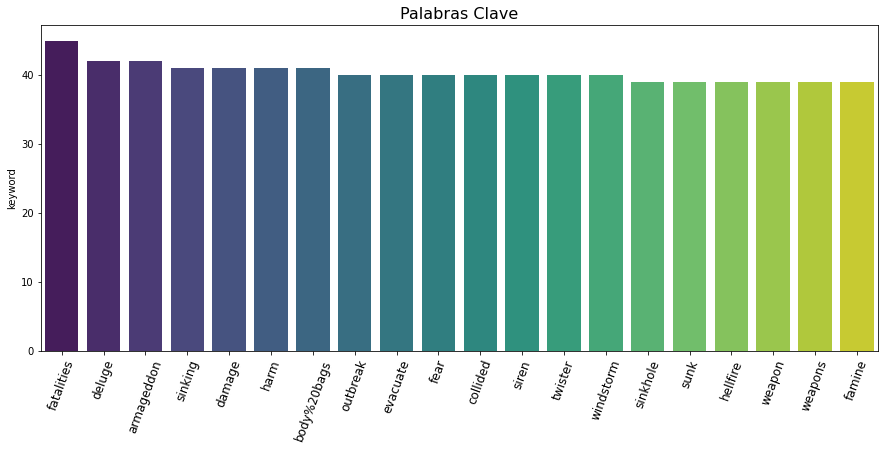

In [8]:
common_keywords=df["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sn.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Palabras Clave",size=16)
plt.xticks(rotation=70,size=12);

### ¿Qué   palabras   cree   que   le   servirán   para   hacer   un   mejor   modelo   de clasificación?

Observando las gráficas, las palabras clave más comunes son las presentes por lo que cada una de estas podria utilizarse para poder detectar un desastre natural de forma más fácil. Ya que muchas de estas comunmente se utilizan durante desastres, tales como fatalidad, daño, miedo, sirenas, cuerpos en bolsa, entre otras.

### Diagrama donde se mencione un DESASTRE

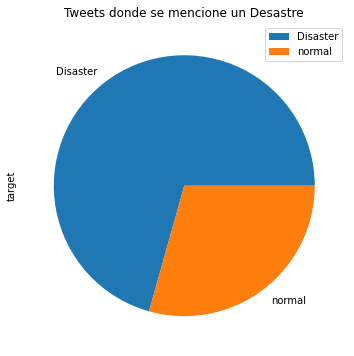

In [9]:
df[df.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets donde se mencione un Desastre");

### ¿Vale la pena explorar bigramas o trigramas para analizar contexto?

En este caso el analizar bigramas o trigramas, podremos interpretar más rápido un tweet donde se haga referencia a algun desastre.
El problema de analizar bigramas o trigramas es que omitiremos muchas palabras clave de nuestro listado por lo que seguramente
omitiremos casos de desastre, ya que en el bigrama/trigrama no se encontrarí

# 5) Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis

Investigar qué palabra se repite más en cada una de las categorías

In [63]:
wc = df[['keyword', 'cleaned_text']].dropna()
wc.head()

keyword                                       cleaned_text
31  ablaze                   bbcmtd wholesale markets ablaze 
32  ablaze                we always try bring heavy metal rt 
33  ablaze  africanbaze breaking newsnigeria flag set abla...
34  ablaze                      crying out more set me ablaze
35  ablaze  on plus side look at sky last night it was abl...

Agrupar por categoría y combinar los textos que pertenecen a la misma

In [64]:
wc['cleaned_text'] = wc.groupby('keyword')['cleaned_text'].transform(lambda x : ' '.join(x))
wc = wc.drop_duplicates()  
wc.head()

keyword                                       cleaned_text
31                ablaze  bbcmtd wholesale markets ablaze  we always try...
67              accident  i cant have kids cuz i got in a bicycle accide...
102           aftershock  aftershockdelo scuf ps live game cya the man w...
136  airplane%20accident  experts in france begin examining airplane deb...
171            ambulance  early wake up call from my sister begging me c...

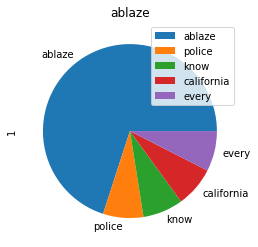

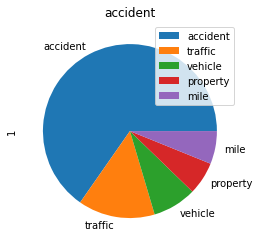

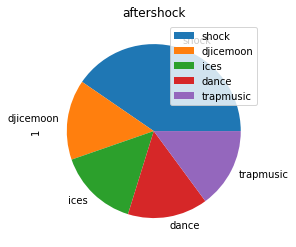

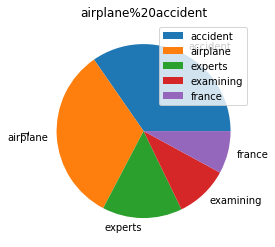

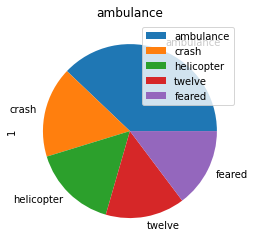

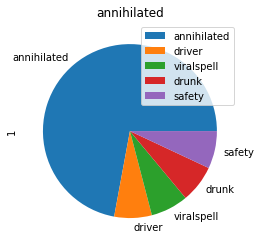

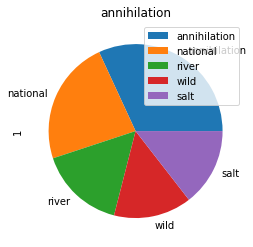

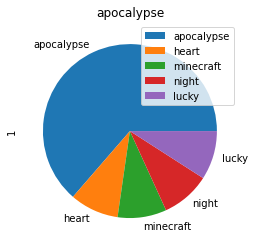

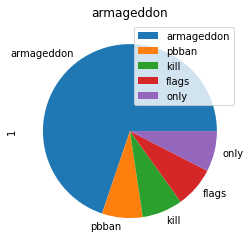

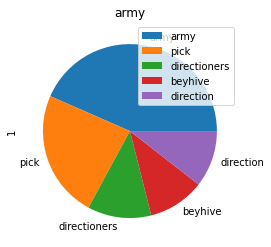

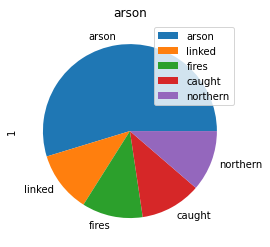

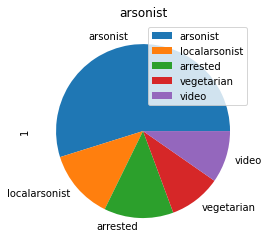

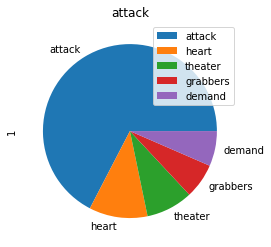

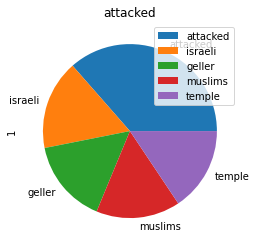

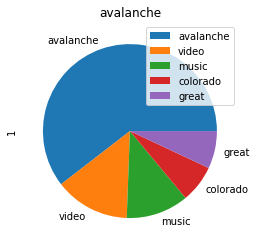

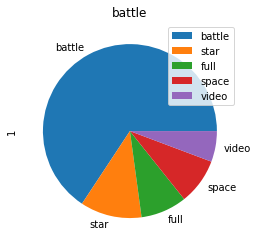

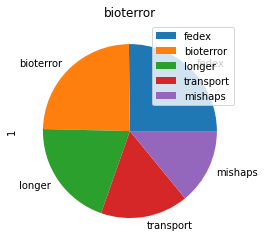

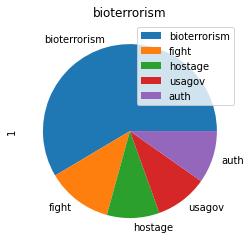

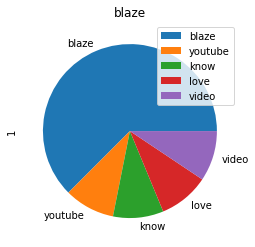

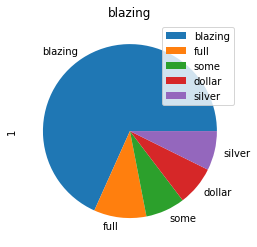

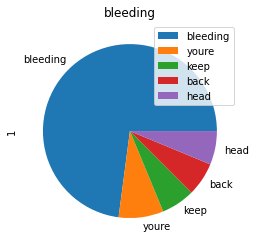

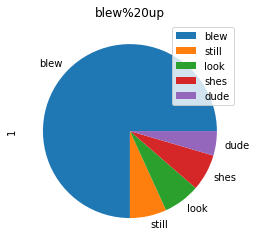

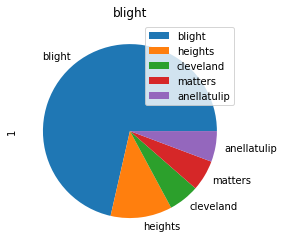

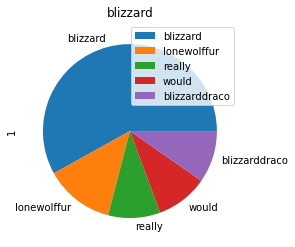

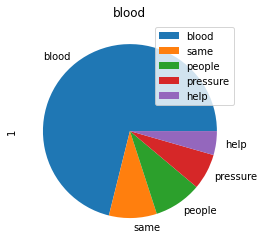

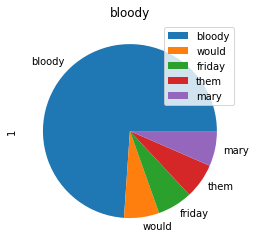

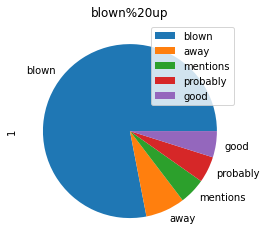

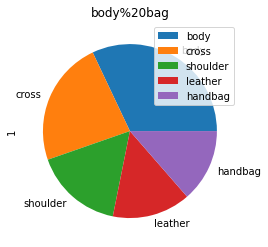

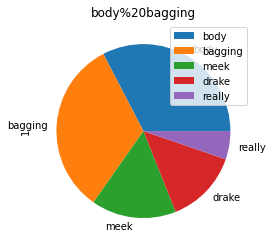

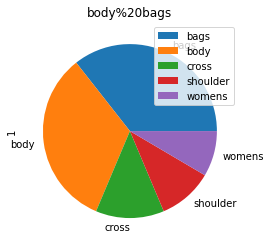

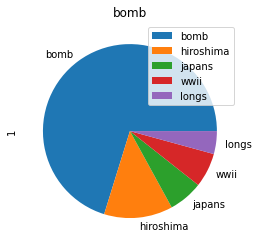

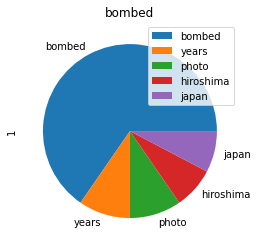

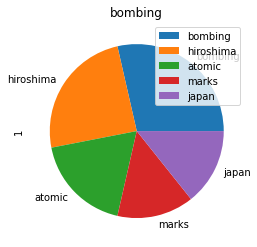

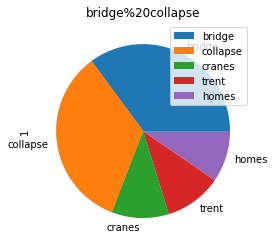

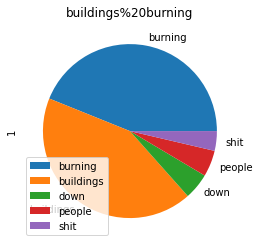

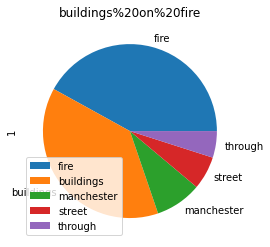

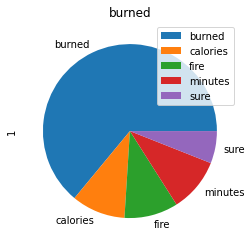

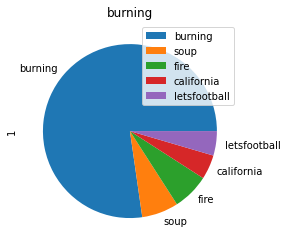

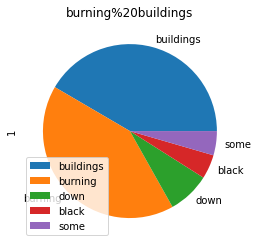

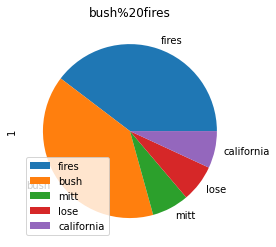

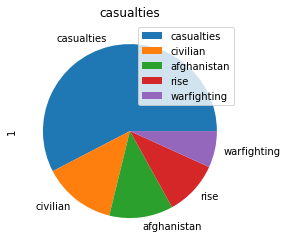

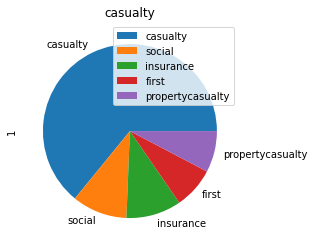

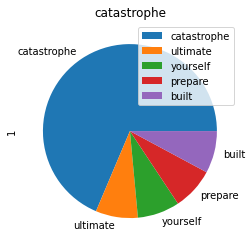

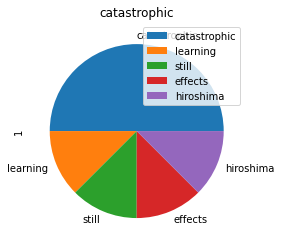

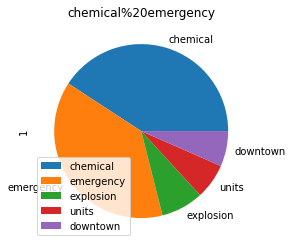

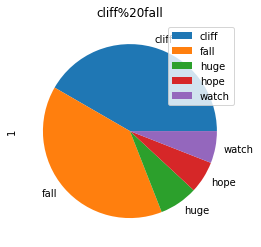

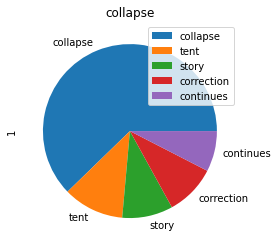

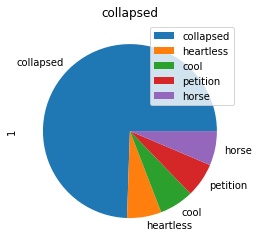

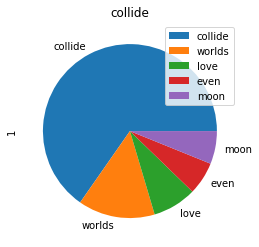

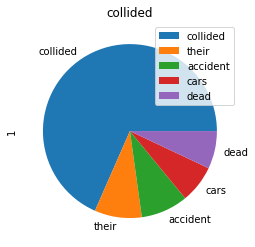

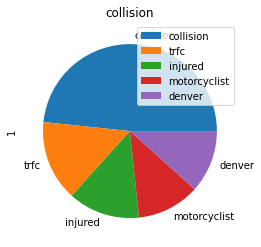

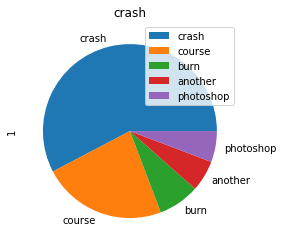

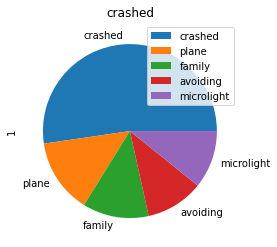

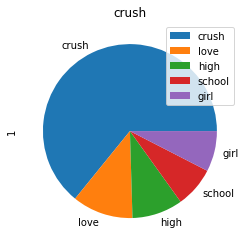

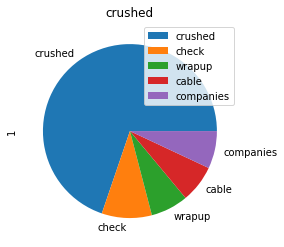

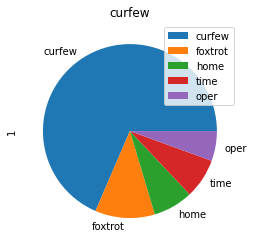

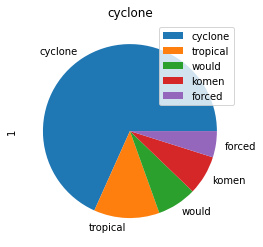

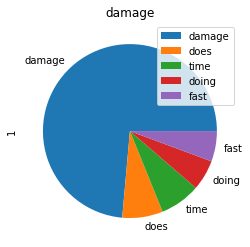

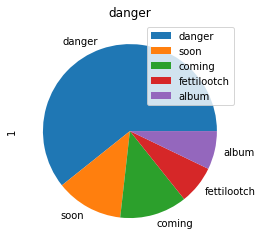

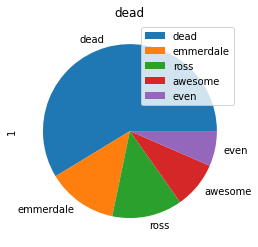

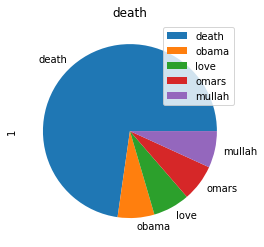

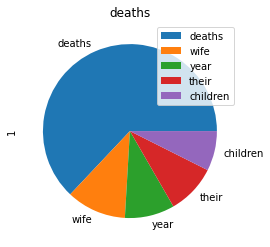

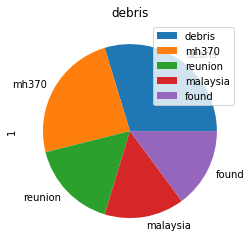

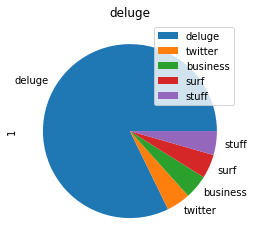

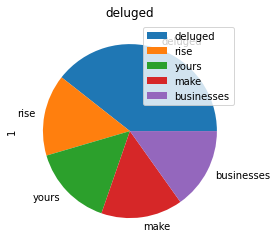

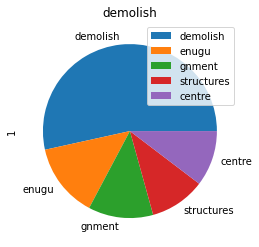

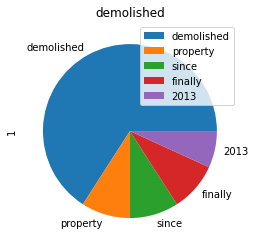

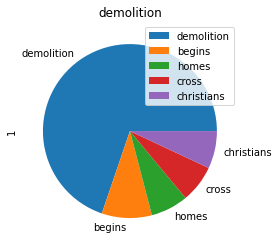

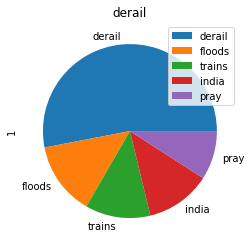

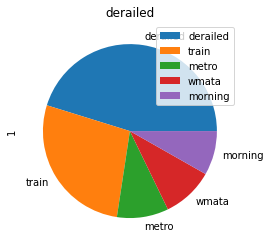

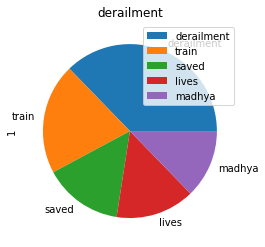

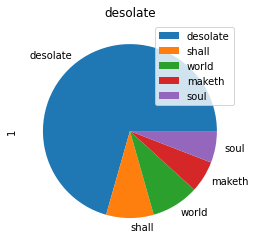

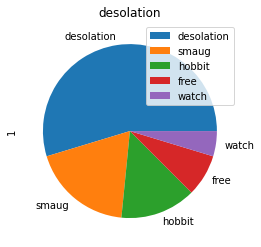

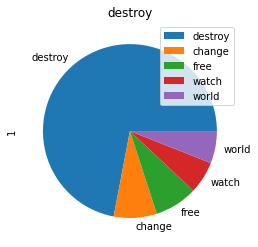

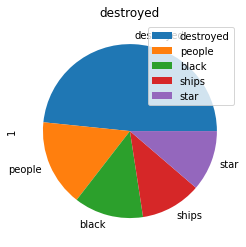

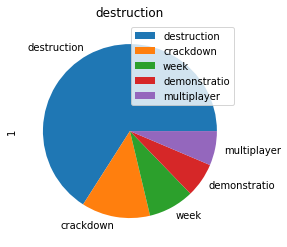

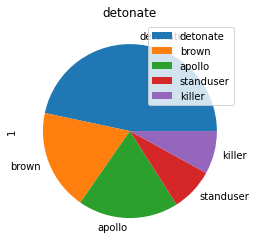

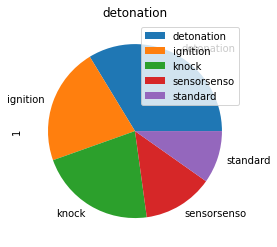

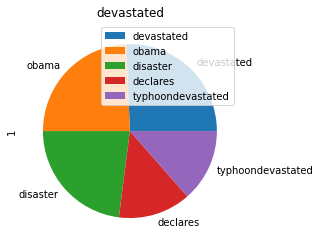

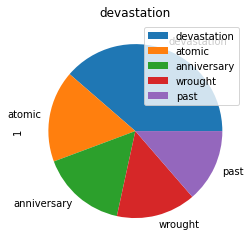

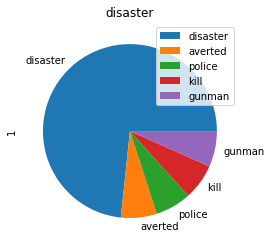

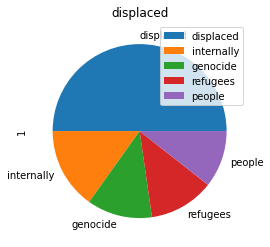

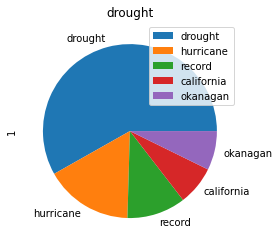

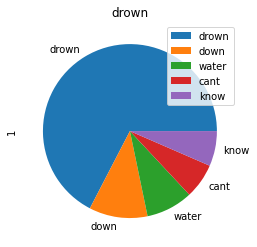

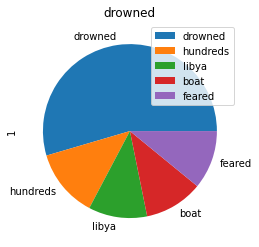

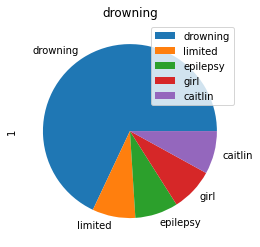

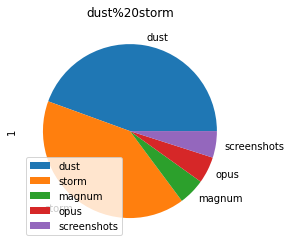

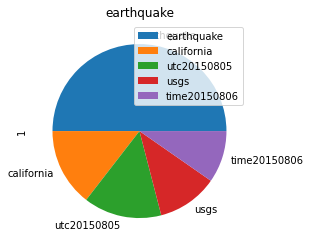

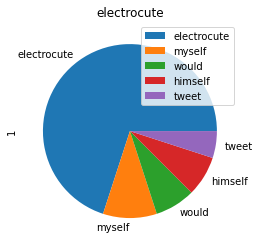

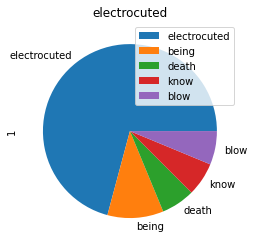

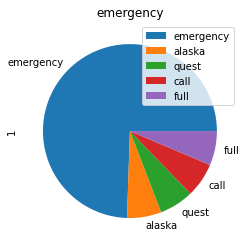

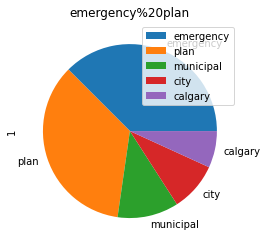

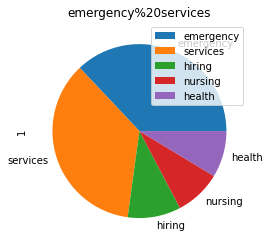

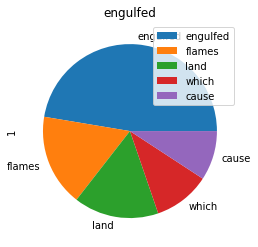

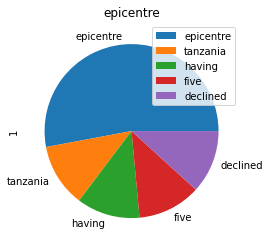

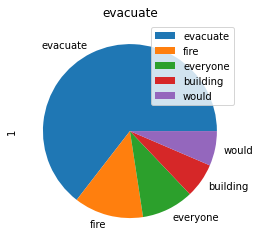

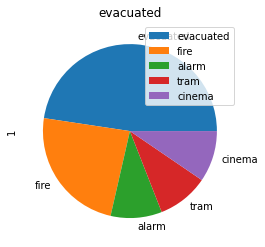

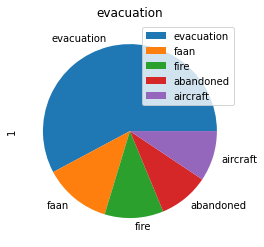

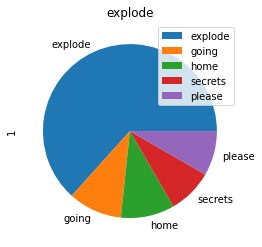

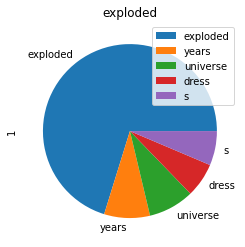

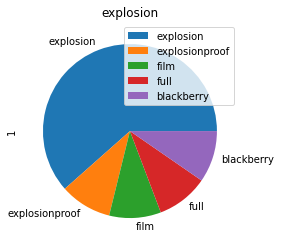

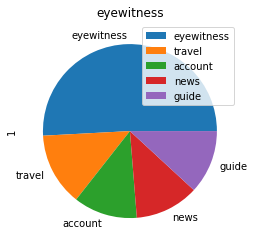

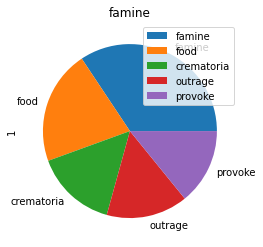

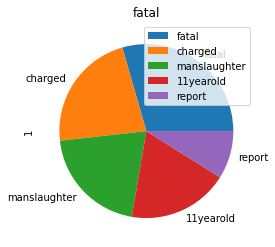

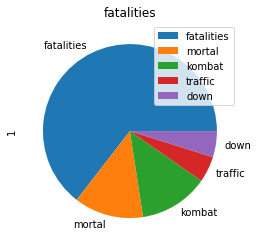

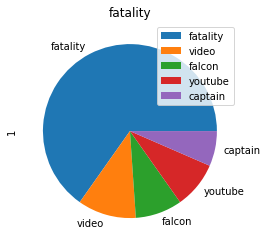

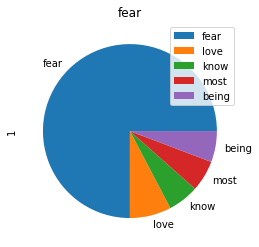

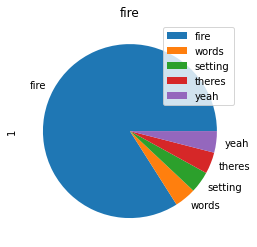

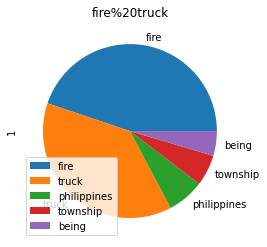

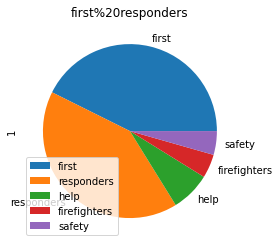

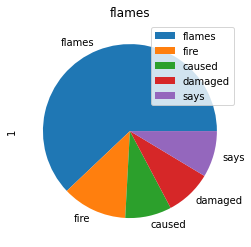

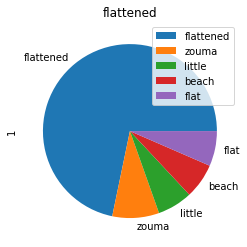

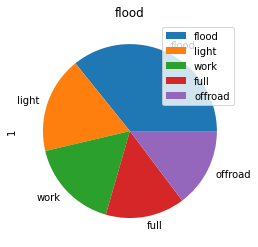

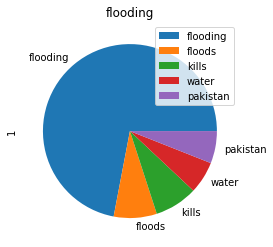

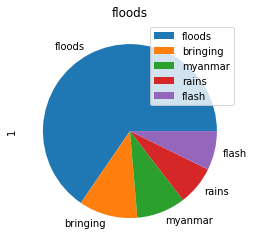

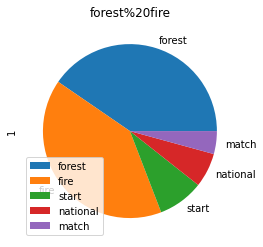

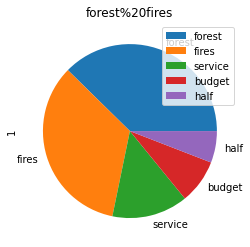

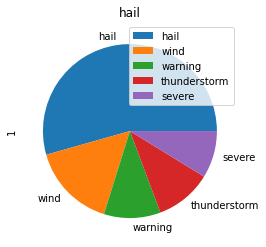

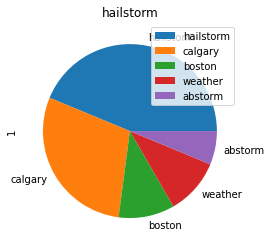

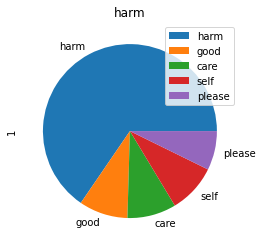

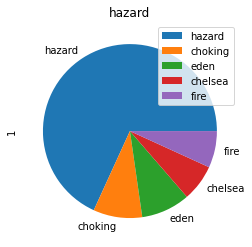

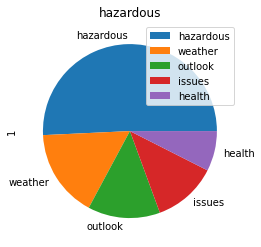

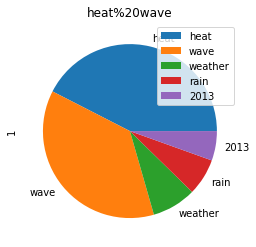

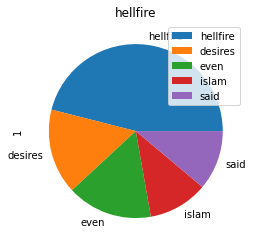

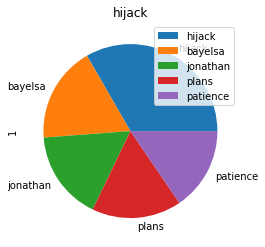

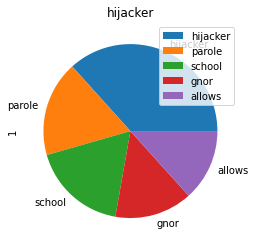

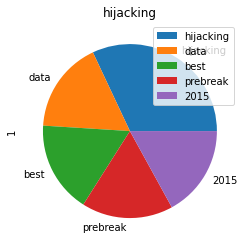

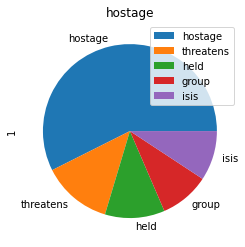

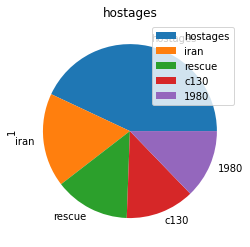

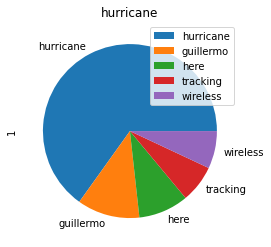

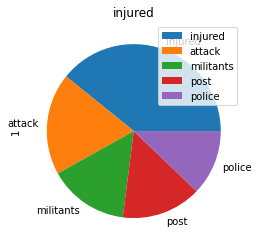

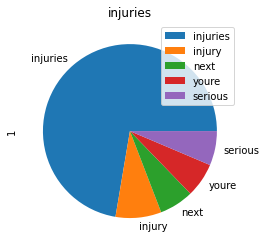

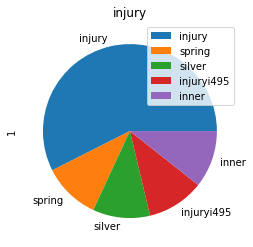

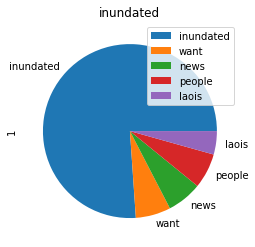

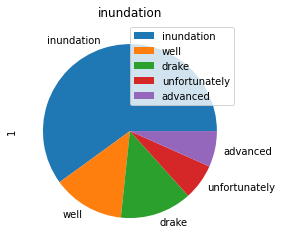

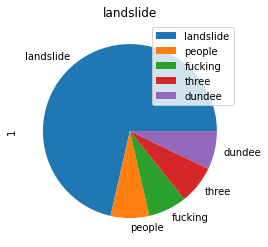

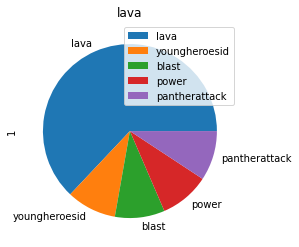

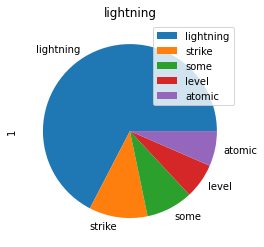

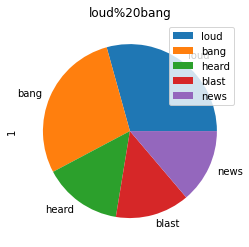

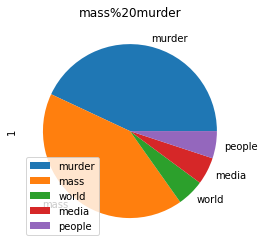

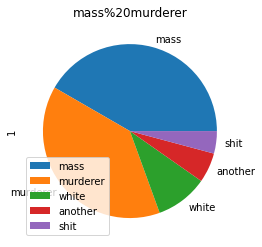

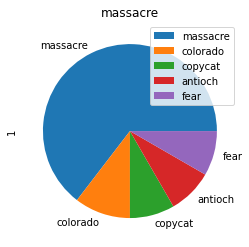

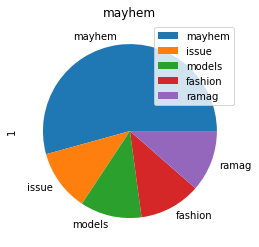

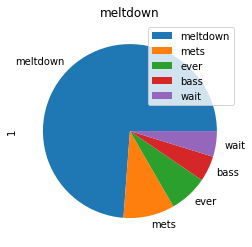

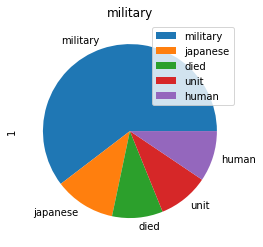

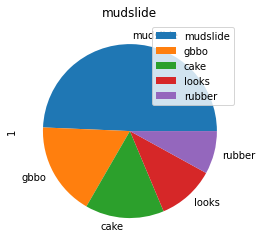

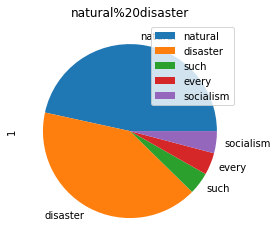

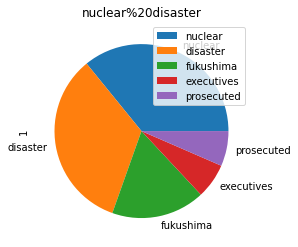

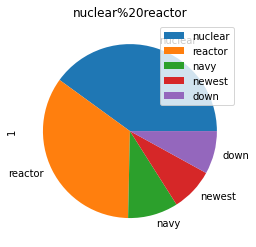

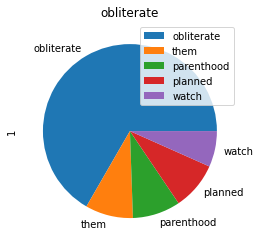

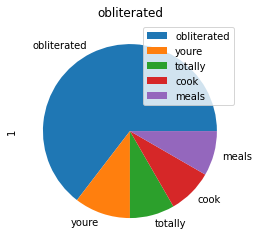

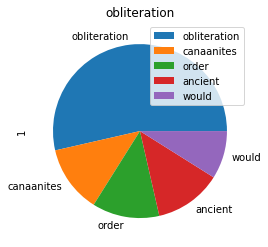

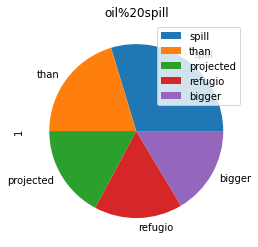

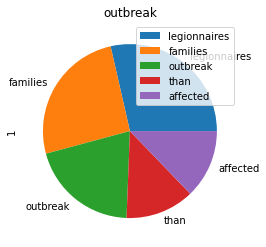

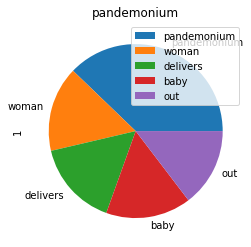

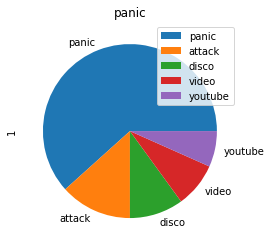

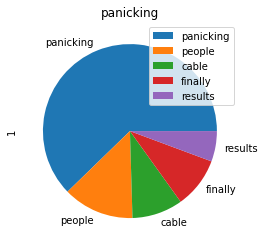

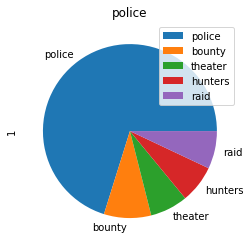

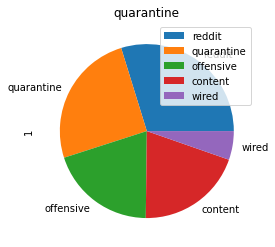

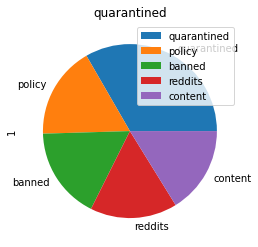

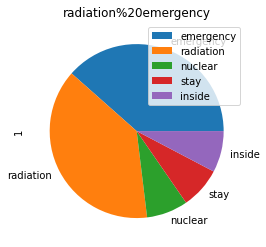

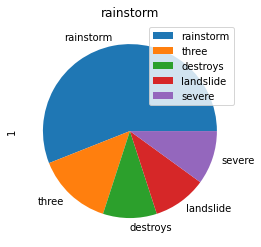

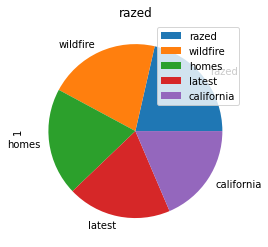

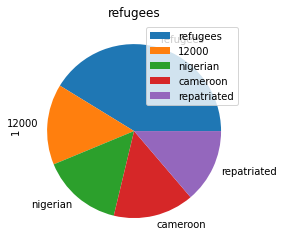

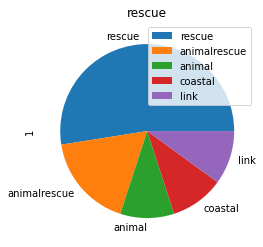

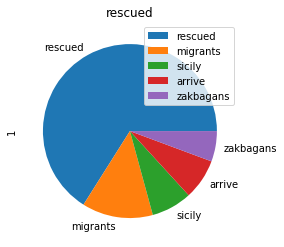

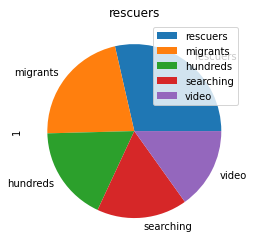

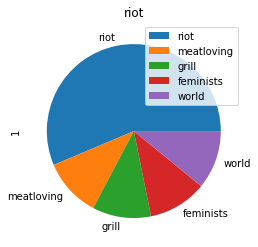

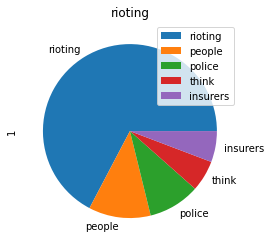

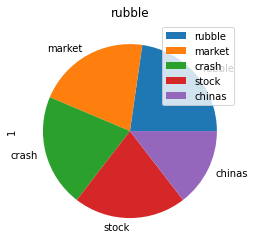

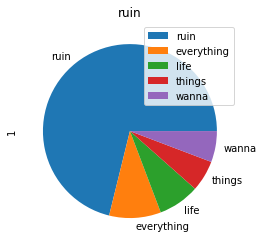

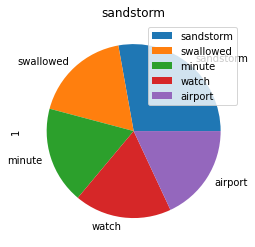

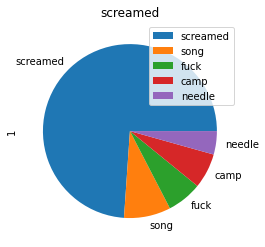

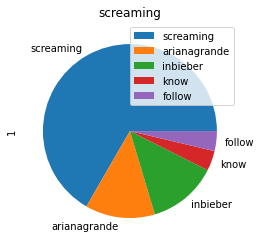

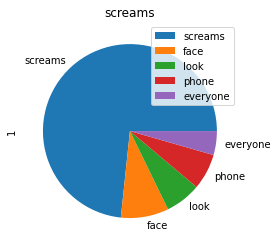

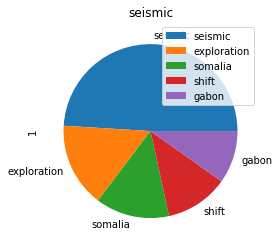

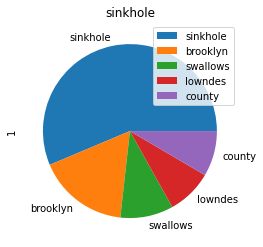

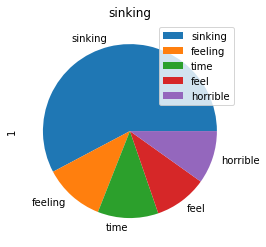

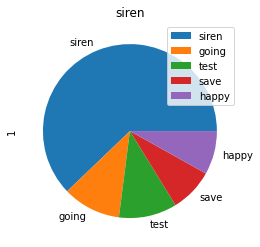

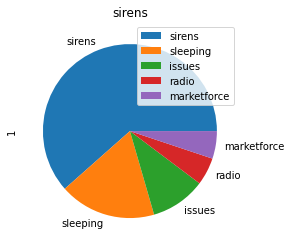

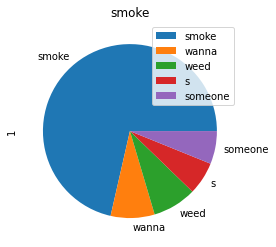

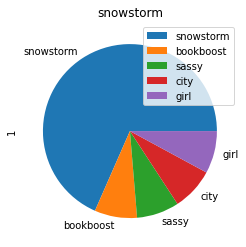

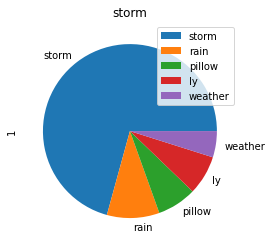

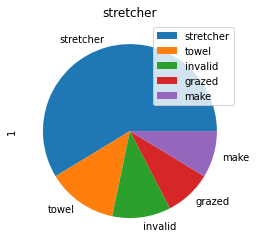

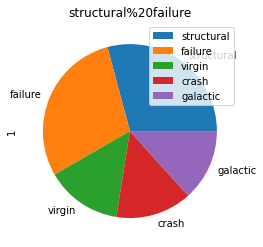

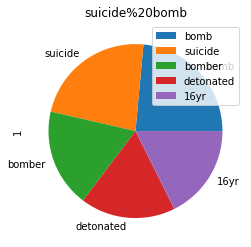

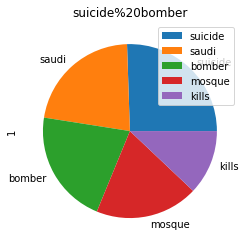

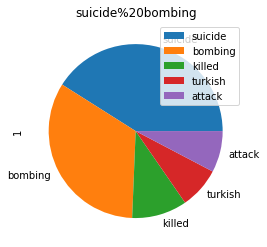

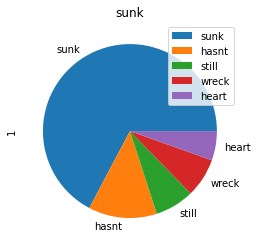

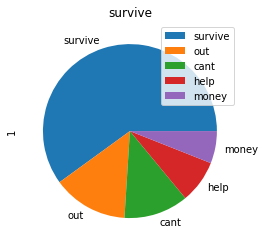

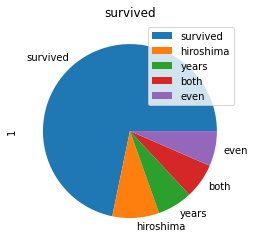

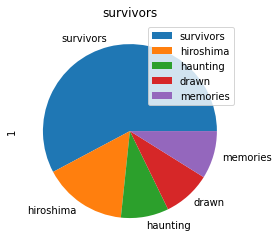

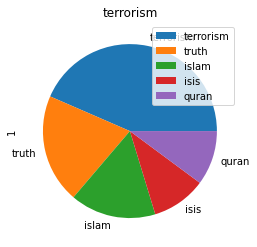

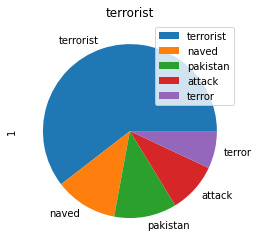

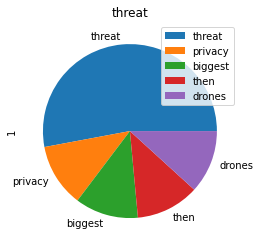

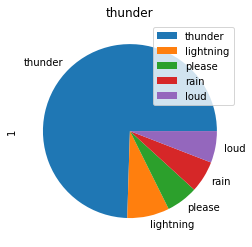

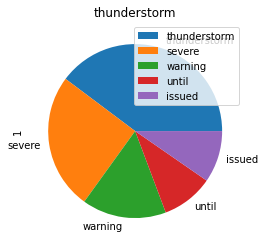

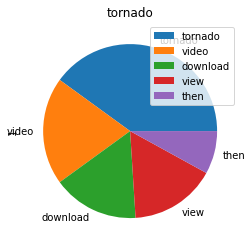

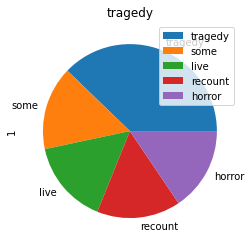

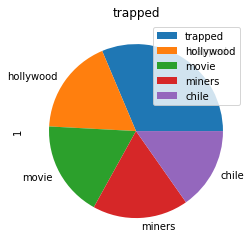

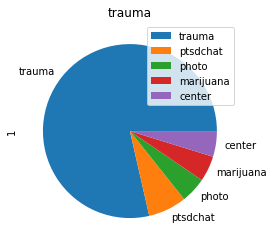

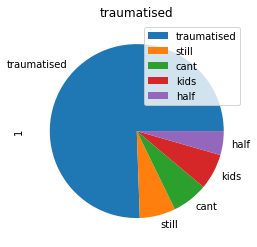

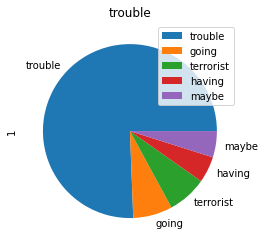

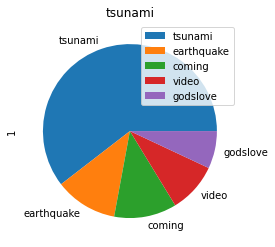

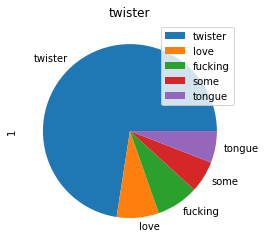

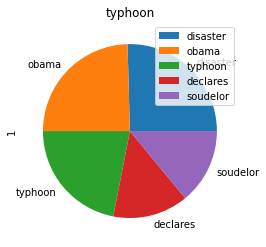

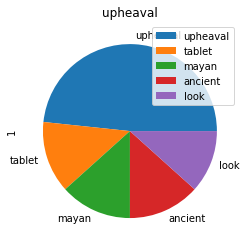

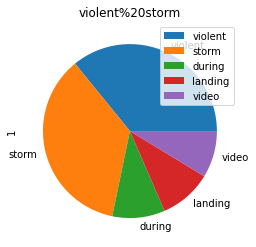

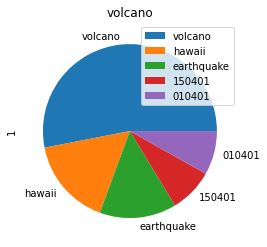

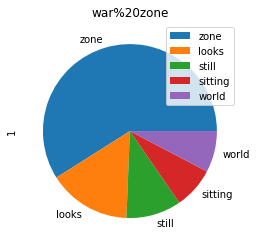

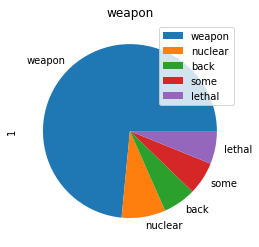

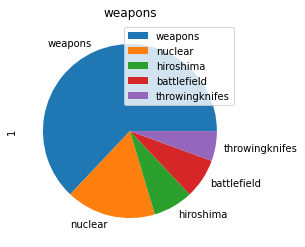

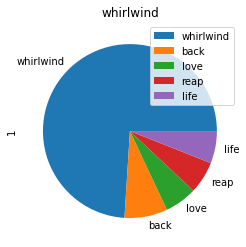

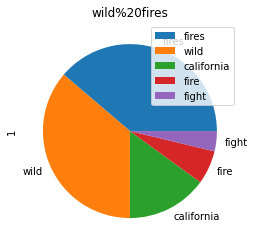

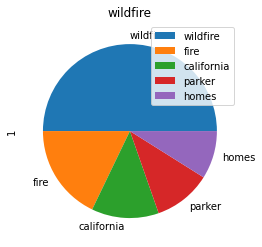

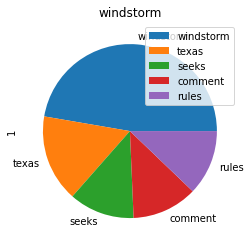

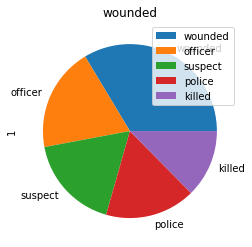

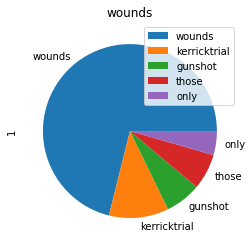

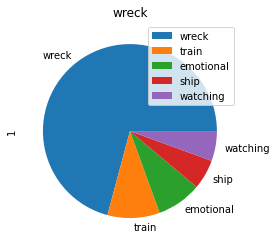

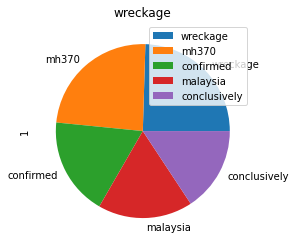

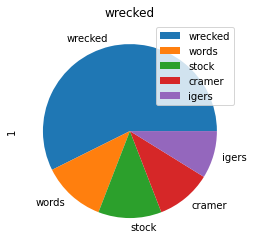

In [105]:
for index, row in wc.iterrows():
    words = ' '.join(word for word in row['cleaned_text'].split() if len(word)>3).replace('that', '').replace('with', '').replace('will', '').replace('they', '').replace('this', '').replace('were', '').replace('these', '').replace('have', '').replace('just', '').replace('like', '').replace('more', '').replace('about', '').replace('after', '').replace('from', '').replace('what', '').replace('been', '').replace('dont', '').replace('into', '').replace('over', '')
    palabra, cantidad = freq(words, prnt=False)
    freqs = {palabra[i]: cantidad[i] for i in range(len(palabra))}
    fdf = pd.DataFrame(freqs.items())
    fdf = fdf.sort_values(1, ascending=False).head().set_index(0)
    fdf.plot.pie(y=1, title=row['keyword'])

Palabras más repetidas en todas las categorías

<AxesSubplot:ylabel='1'>

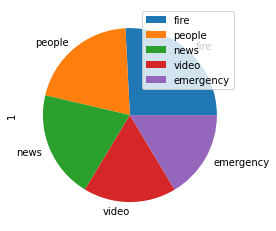

In [104]:
words = ''
for index, row in wc.iterrows():
    words +=' '.join(word for word in row['cleaned_text'].split() if len(word)>3).replace('that', '').replace('with', '').replace('will', '').replace('they', '').replace('this', '').replace('were', '').replace('these', '').replace('have', '').replace('just', '').replace('like', '').replace('more', '').replace('about', '').replace('after', '').replace('from', '').replace('what', '').replace('been', '').replace('dont', '').replace('into', '').replace('over', '')

palabra, cantidad = freq(words, prnt=False)
freqs = {palabra[i]: cantidad[i] for i in range(len(palabra))}
fdf = pd.DataFrame(freqs.items())
fdf = fdf.sort_values(1, ascending=False).head().set_index(0)
fdf.plot.pie(y=1)